In [1]:
import pylab as plt
import pandas as pd
import akshare as ak
import seaborn as sns

JSONDecodeError: ('Unknown identifier', 'ad')

AkShare 事件数据:新型冠状病毒
    
    AkShare 是基于 Python 的开源金融数据接口库, 目的是实现对股票, 期货, 期权, 基金, 外汇, 债券, 指数, 数字货币等金融产品的基本面数据、实时和历史行情数据、衍生数据从数据采集, 数据清洗, 到数据落地的一套开源工具, 满足金融数据科学家, 数据科学爱好者在金融数据获取方面的需求.

AkShare 的特点是获取的是相对权威的金融数据网站公布的原始数据, 广大数据科学家可以利用原始数据进行各数据源之间的交叉验证, 进而再加工, 从而得出科学的结论.

https://akshare.readthedocs.io/zh_CN/latest/data/event/event.html

# Getting Data using akshare

In [1]:
epidemic_163_df = ak.epidemic_163(indicator="实时")
print(epidemic_163_df)


数据更新时间: 2020-02-18 14:51:36
         today  total
confirm   1895  72530
suspect   1432   6242
heal      1857  12710
dead        98   1870


In [4]:
epidemic_163_df

today  total
confirm   1895  72530
suspect   1432   6242
heal      1857  12710
dead        98   1870

In [5]:
epidemic_163_his = ak.epidemic_163(indicator="历史")
print(epidemic_163_his)

数据更新时间: 2020-02-18 14:51:36
            confirm  suspect   heal  dead
2020-01-20      291       54      0     6
2020-01-21      440       37      0     9
2020-01-22      571      393     28    17
2020-01-23      830     1072     34    25
2020-01-24     1287     1965     38    41
...             ...      ...    ...   ...
2020-02-13    63851    10109   6723  1380
2020-02-14    66492     8969   8096  1523
2020-02-15    68500     8228   9419  1665
2020-02-16    70548     7264  10844  1770
2020-02-17    72436     6242  12552  1868

[29 rows x 4 columns]


In [6]:
epidemic_163_his

confirm  suspect   heal  dead
2020-01-20      291       54      0     6
2020-01-21      440       37      0     9
2020-01-22      571      393     28    17
2020-01-23      830     1072     34    25
2020-01-24     1287     1965     38    41
...             ...      ...    ...   ...
2020-02-13    63851    10109   6723  1380
2020-02-14    66492     8969   8096  1523
2020-02-15    68500     8228   9419  1665
2020-02-16    70548     7264  10844  1770
2020-02-17    72436     6242  12552  1868

[29 rows x 4 columns]

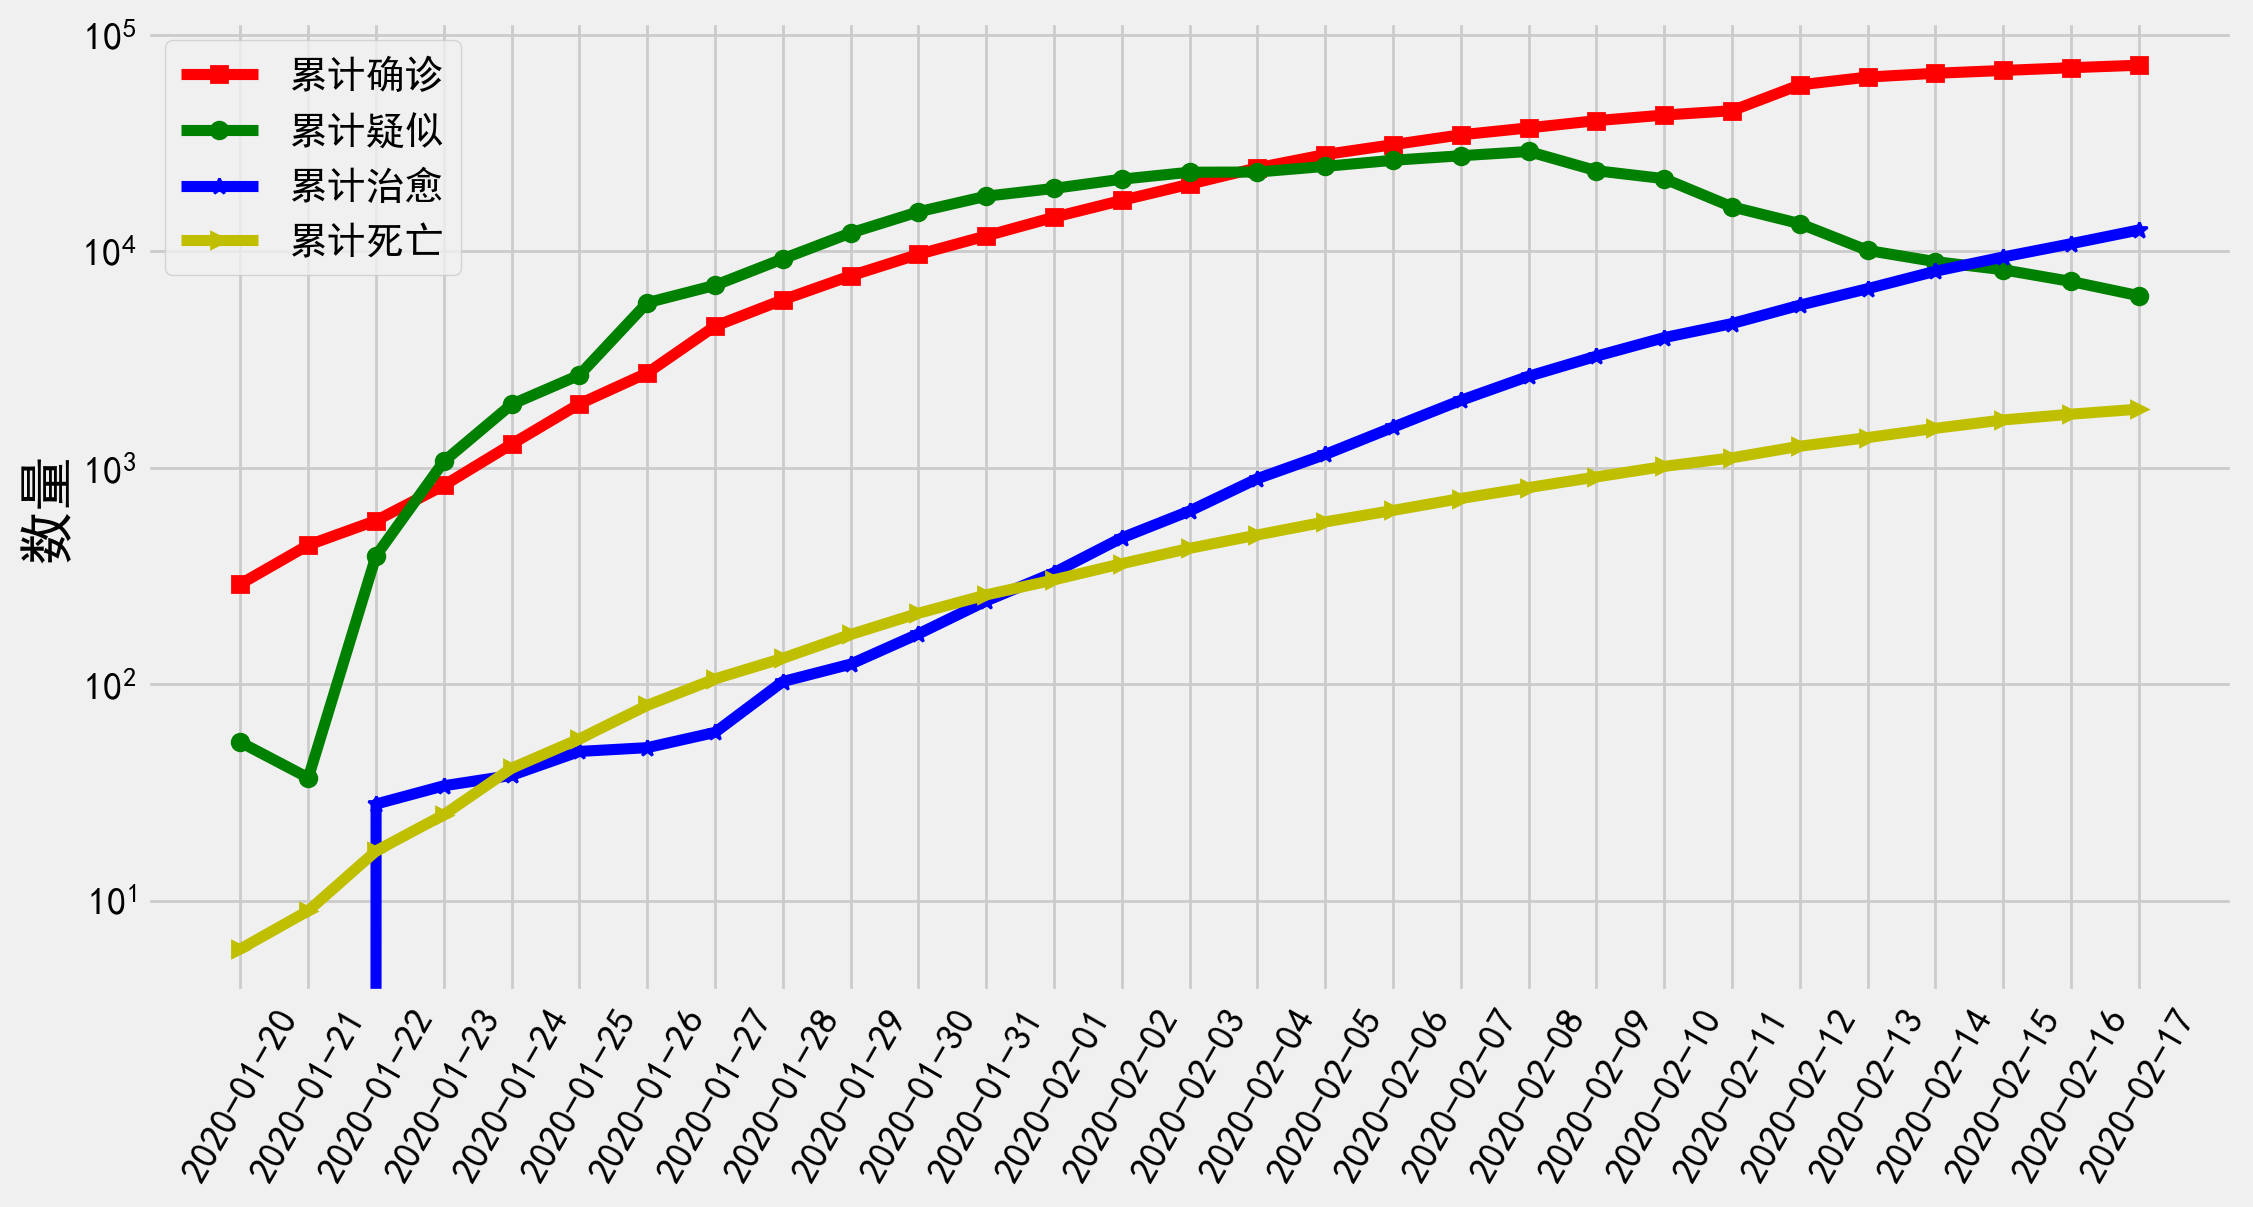

In [38]:
plt.figure(figsize=(12, 6), dpi = 200)
plt.style.use('fivethirtyeight')
plt.plot(epidemic_163_his.index, epidemic_163_his['confirm'], 'r-s', label = '累计确诊')
plt.plot(epidemic_163_his.index, epidemic_163_his['suspect'], 'g-o', label = '累计疑似')
plt.plot(epidemic_163_his.index, epidemic_163_his['heal'], 'b-*', label = '累计治愈')
plt.plot(epidemic_163_his.index, epidemic_163_his['dead'], 'y->', label = '累计死亡')
plt.legend()
plt.yscale('log')
plt.xticks(rotation=60)
plt.ylabel('数量', fontsize = 20)
plt.show()

## 丁香园数据

In [34]:
import akshare as ak
epidemic_dxy_df = ak.epidemic_dxy(indicator="全国")
print(epidemic_dxy_df)

       地区 地区简称   现存确诊   累计确诊    治愈    死亡
0     湖北省   湖北  50298  59989  7902  1789
1     广东省   广东    786   1328   538     4
2     河南省   河南    724   1257   514    19
3     浙江省   浙江    654   1172   518     0
4     安徽省   安徽    648    982   328     6
..    ...  ...    ...    ...   ...   ...
29    甘肃省   甘肃     31     91    58     2
30     台湾   台湾     19     22     2     1
31     澳门   澳门      5     10     5     0
32    青海省   青海      4     18    14     0
33  西藏自治区   西藏      0      1     1     0

[34 rows x 6 columns]


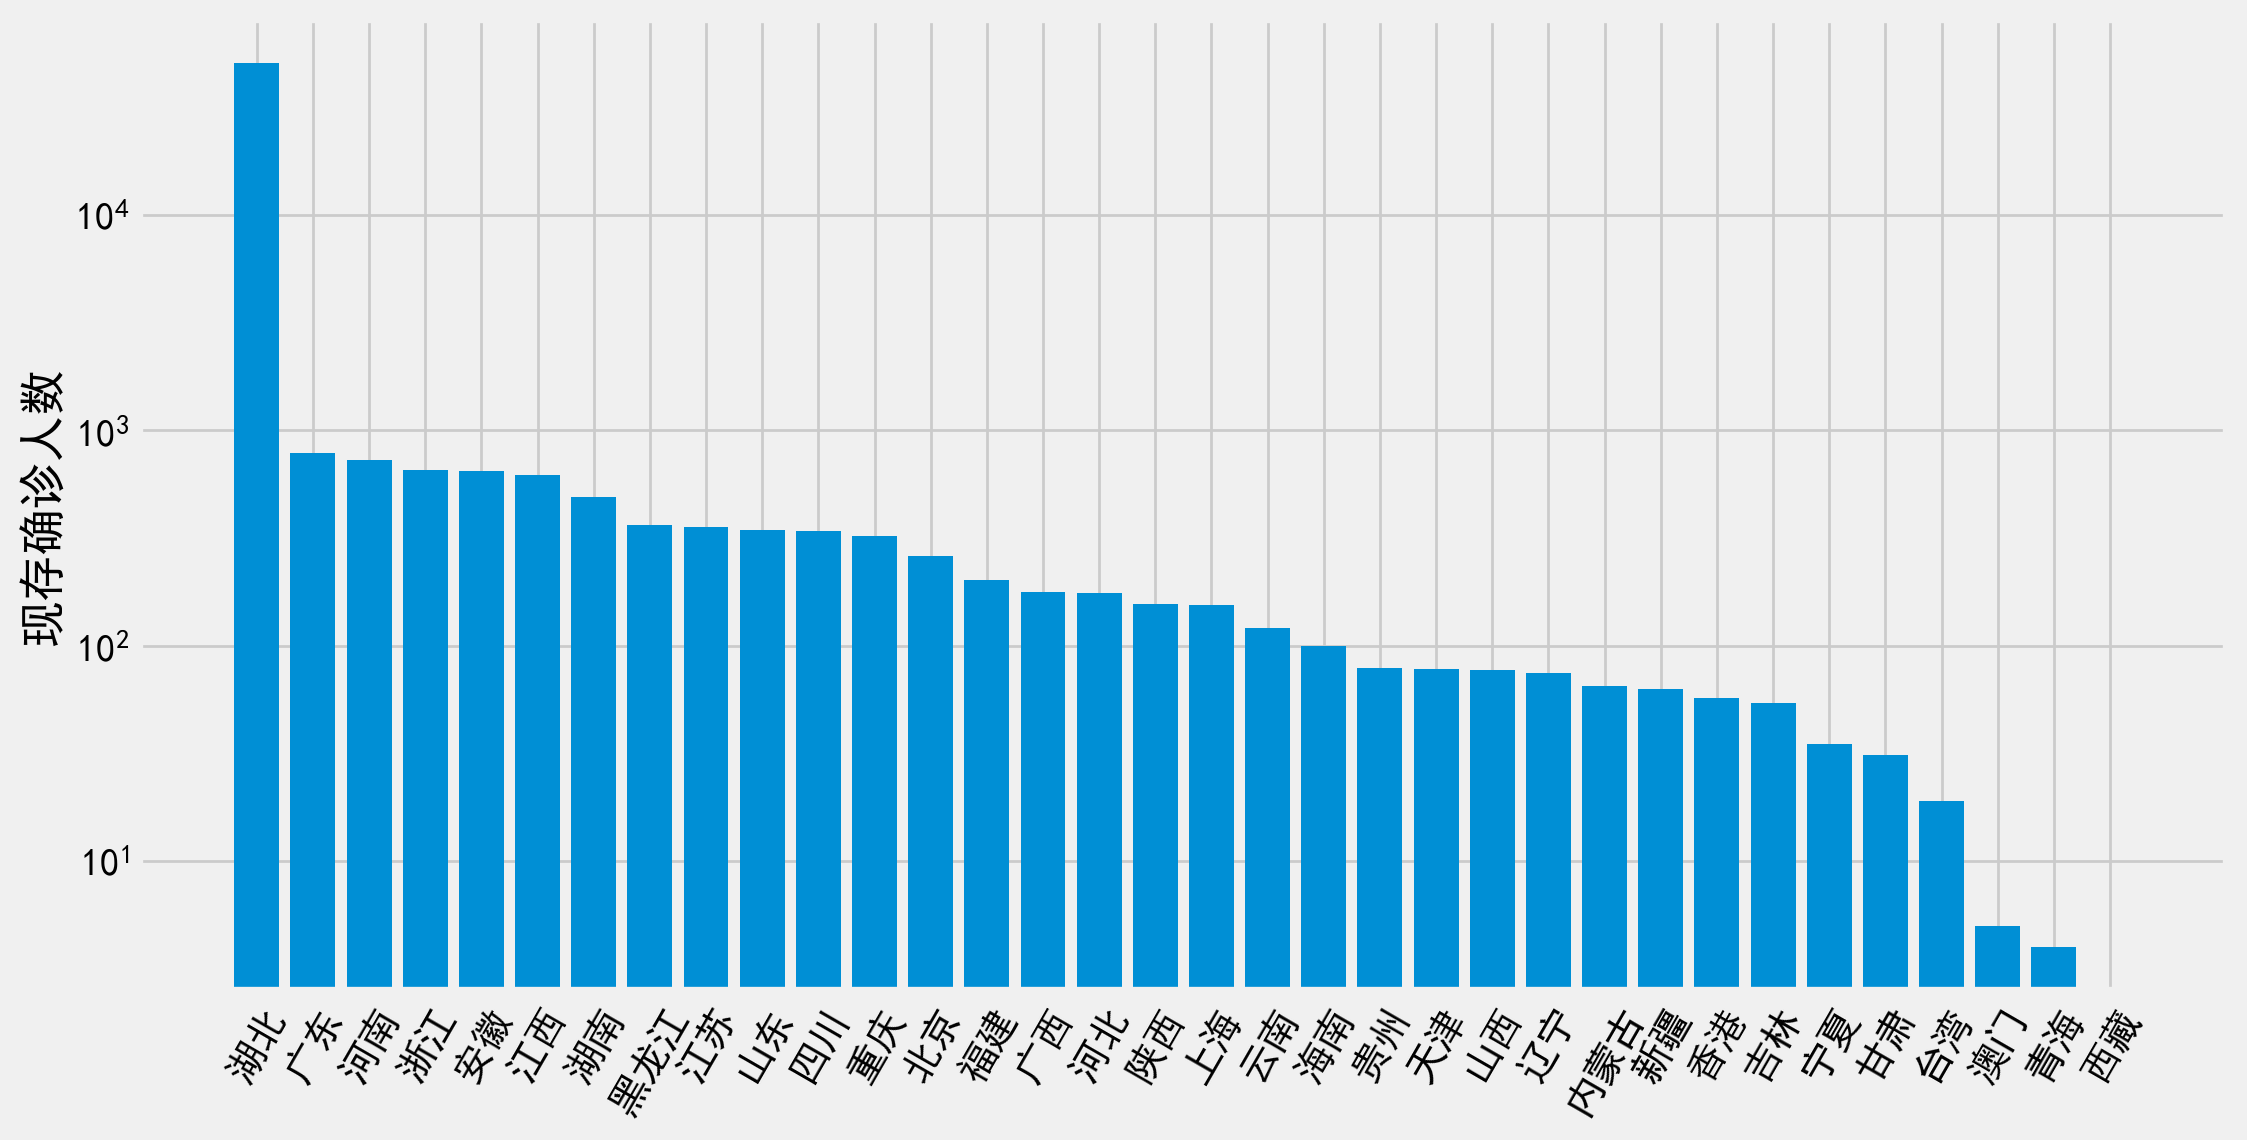

In [36]:
plt.figure(figsize=(12, 6), dpi = 200)
plt.bar(height = epidemic_dxy_df['现存确诊'], x= epidemic_dxy_df['地区简称'])
plt.ylabel('现存确诊人数')
plt.yscale('log')
plt.xticks(rotation=60);

In [28]:
epidemic_dxy_df = ak.epidemic_dxy(indicator="江苏省")
print(epidemic_dxy_df)

    区域  现在确诊人数  确诊人数  疑似人数  治愈人数  死亡人数
0   南京      60    92     0    32     0
1   苏州      56    87     0    31     0
2   淮安      38    66     0    28     0
3   徐州      37    79     0    42     0
4   无锡      34    55     0    21     0
..  ..     ...   ...   ...   ...   ...
8   泰州      15    37     0    22     0
9   扬州      14    23     0     9     0
10  盐城      11    27     0    16     0
11  镇江       7    12     0     5     0
12  宿迁       6    13     0     7     0

[13 rows x 6 columns]


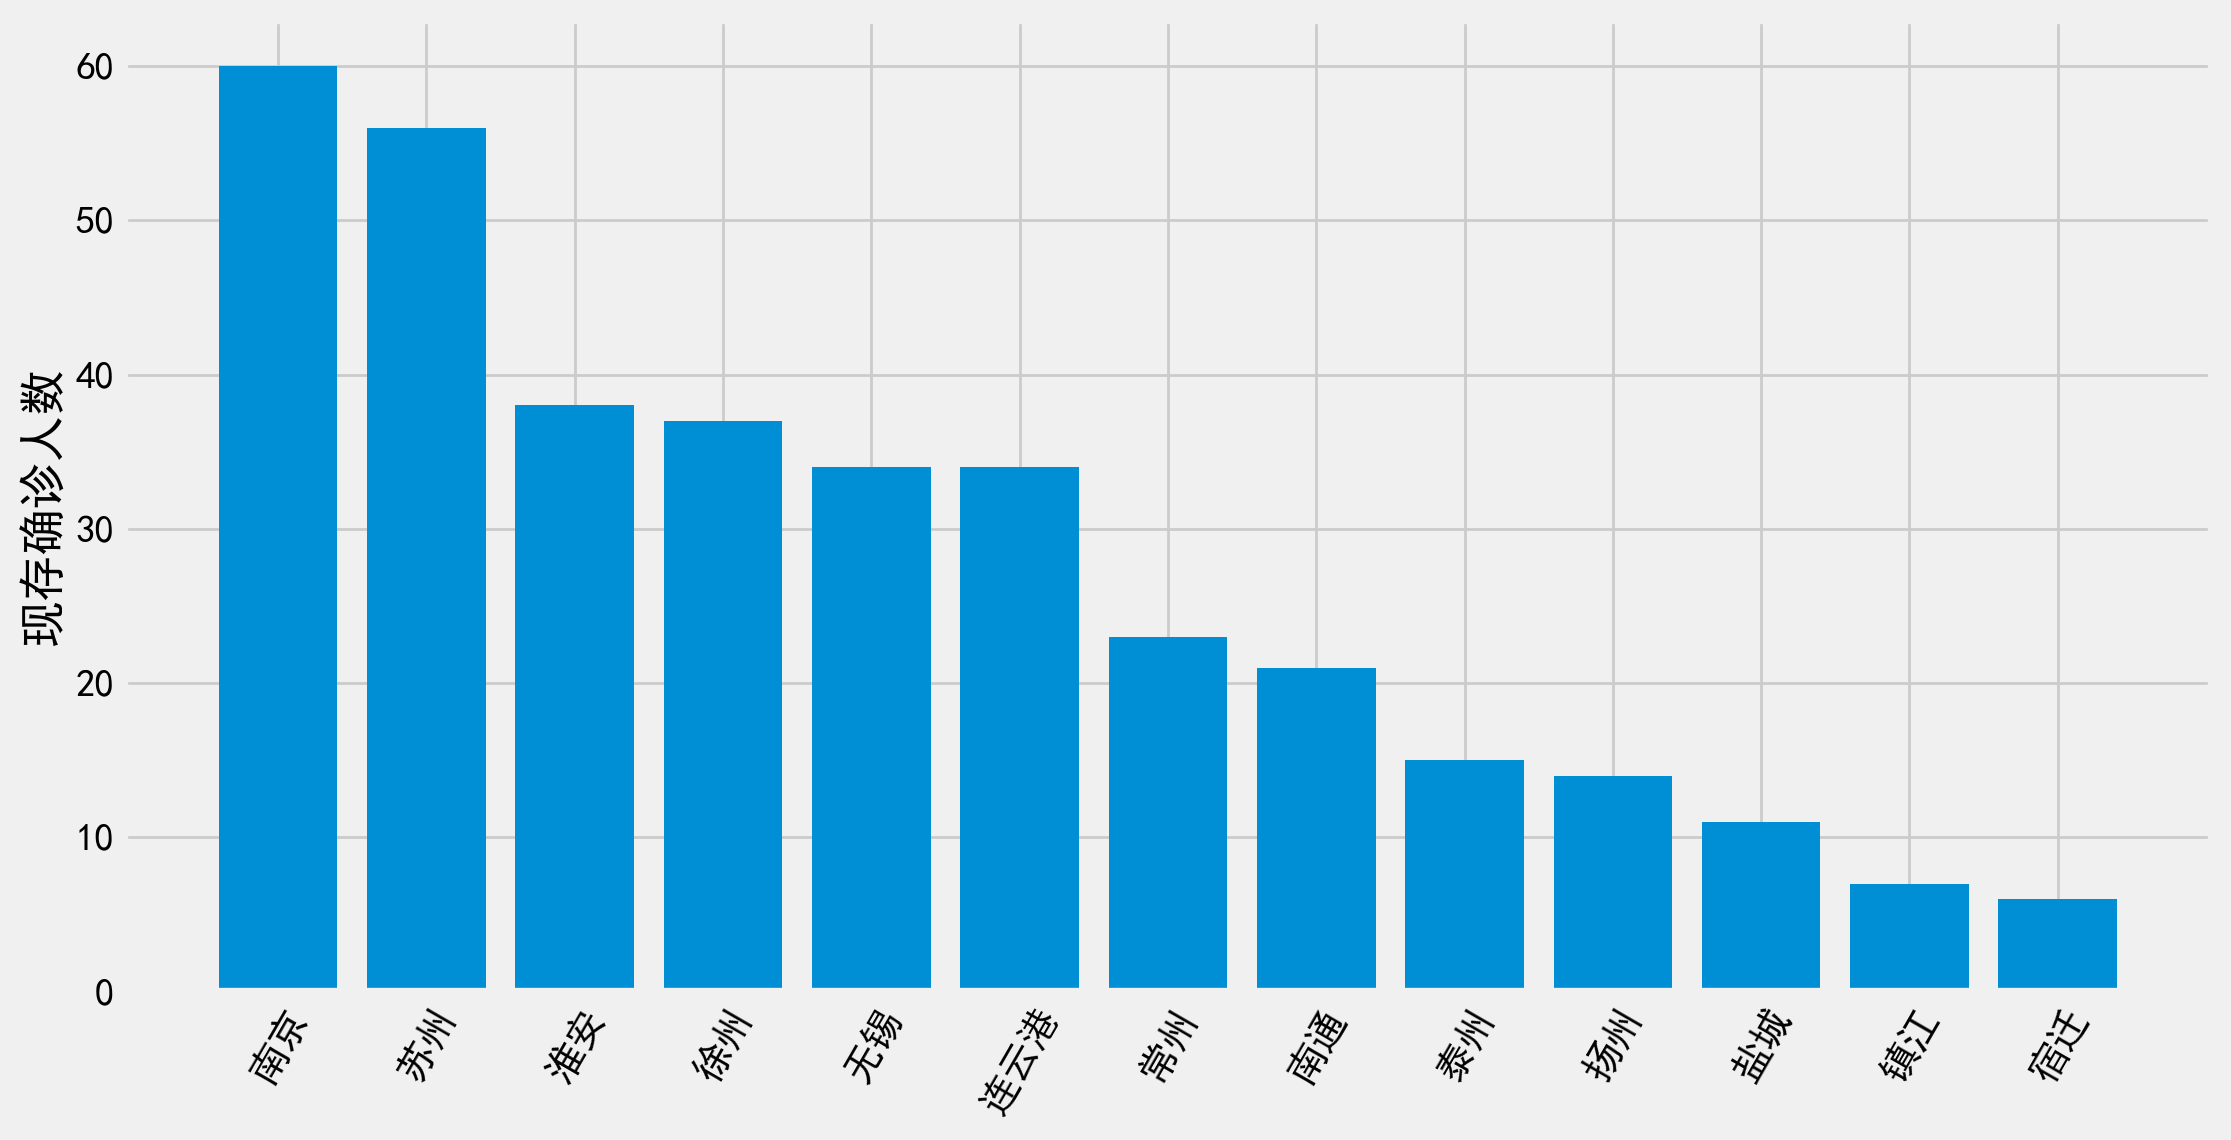

In [33]:
plt.figure(figsize=(12, 6),dpi = 200)
plt.bar(height = epidemic_dxy_df['现在确诊人数'], x= epidemic_dxy_df['区域'])
plt.ylabel('现存确诊人数')
#plt.yscale('log')
plt.xticks(rotation=60);

## 百度迁移

In [48]:
epidemic_baidu_df = ak.epidemic_baidu(indicator="热门迁入地")
print(epidemic_baidu_df)

   city_name province_name  value city_code
0        广州市           广东省   4.08    440100
1        东莞市           广东省   3.86    441900
2        深圳市           广东省   3.83    440300
3        北京市           北京市   2.85    110000
4        苏州市           江苏省   2.17    320500
..       ...           ...    ...       ...
25       珠海市           广东省   0.77    440400
26       晋中市           山西省   0.71    140700
27       遵义市           贵州省   0.68    520300
28       中山市           广东省   0.67    442000
29       南宁市       广西壮族自治区   0.67    450100

[30 rows x 4 columns]


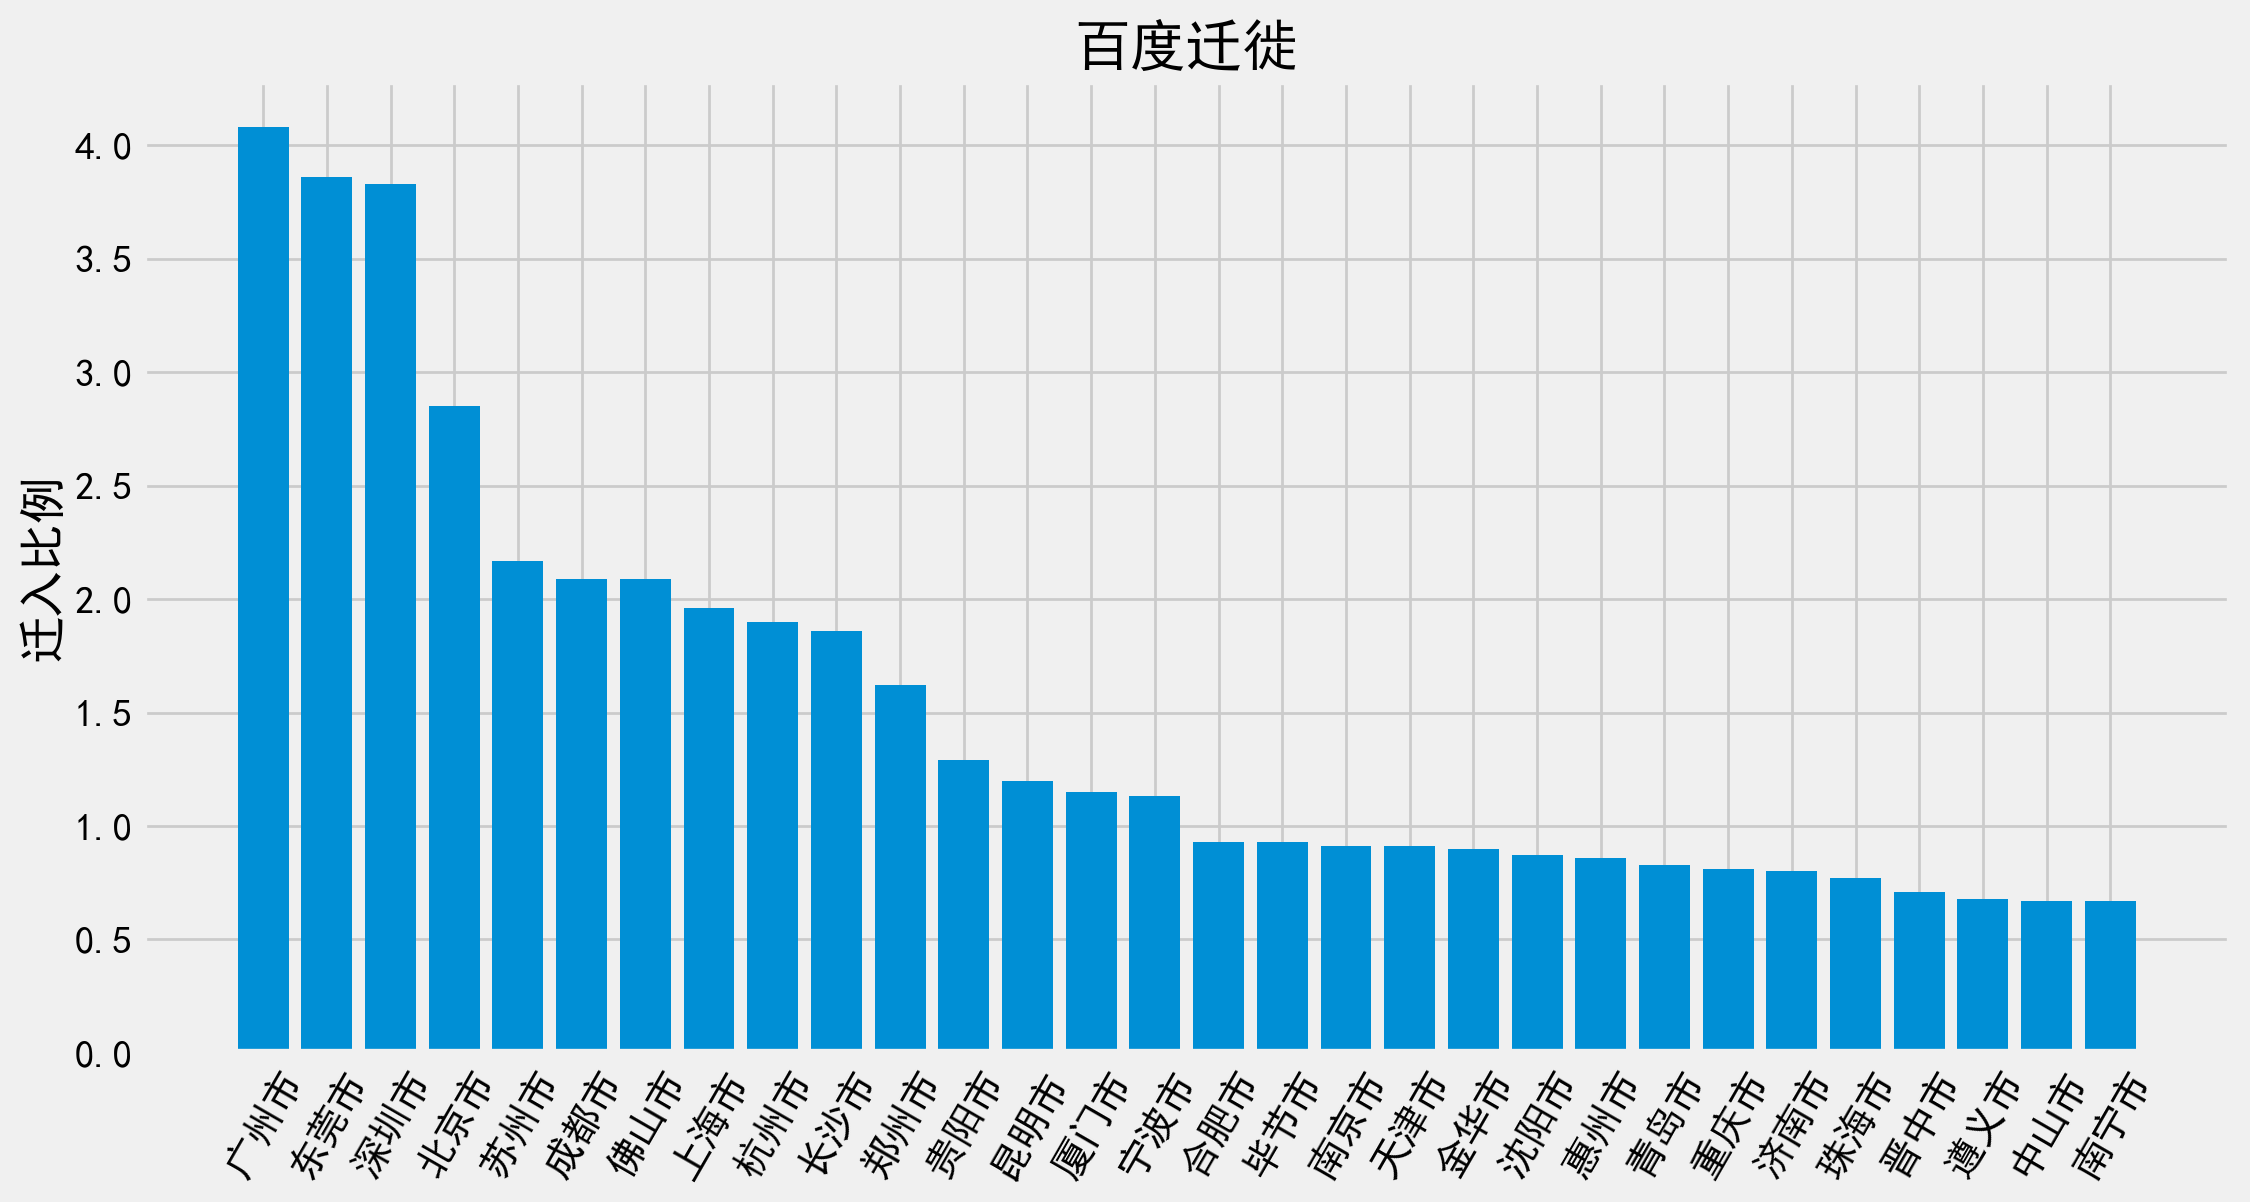

In [49]:
plt.figure(figsize=(12, 6),dpi = 200)
plt.bar(height = epidemic_baidu_df['value'], x= epidemic_baidu_df['city_name'])
plt.ylabel('迁入比例')
plt.title('百度迁徙')
#plt.yscale('log')
plt.xticks(rotation=60);

In [45]:
epidemic_baidu_df = ak.epidemic_baidu(indicator="热门迁出地")
print(epidemic_baidu_df)

   city_name province_name  value city_code
0        广州市           广东省   1.88    440100
1        深圳市           广东省   1.53    440300
2        佛山市           广东省   1.34    440600
3        东莞市           广东省   1.32    441900
4        毕节市           贵州省   1.17    520500
..       ...           ...    ...       ...
25       邯郸市           河北省   0.64    130400
26      石家庄市           河北省   0.62    130100
27       赣州市           江西省   0.60    360700
28       泉州市           福建省   0.59    350500
29       沈阳市           辽宁省   0.59    210100

[30 rows x 4 columns]


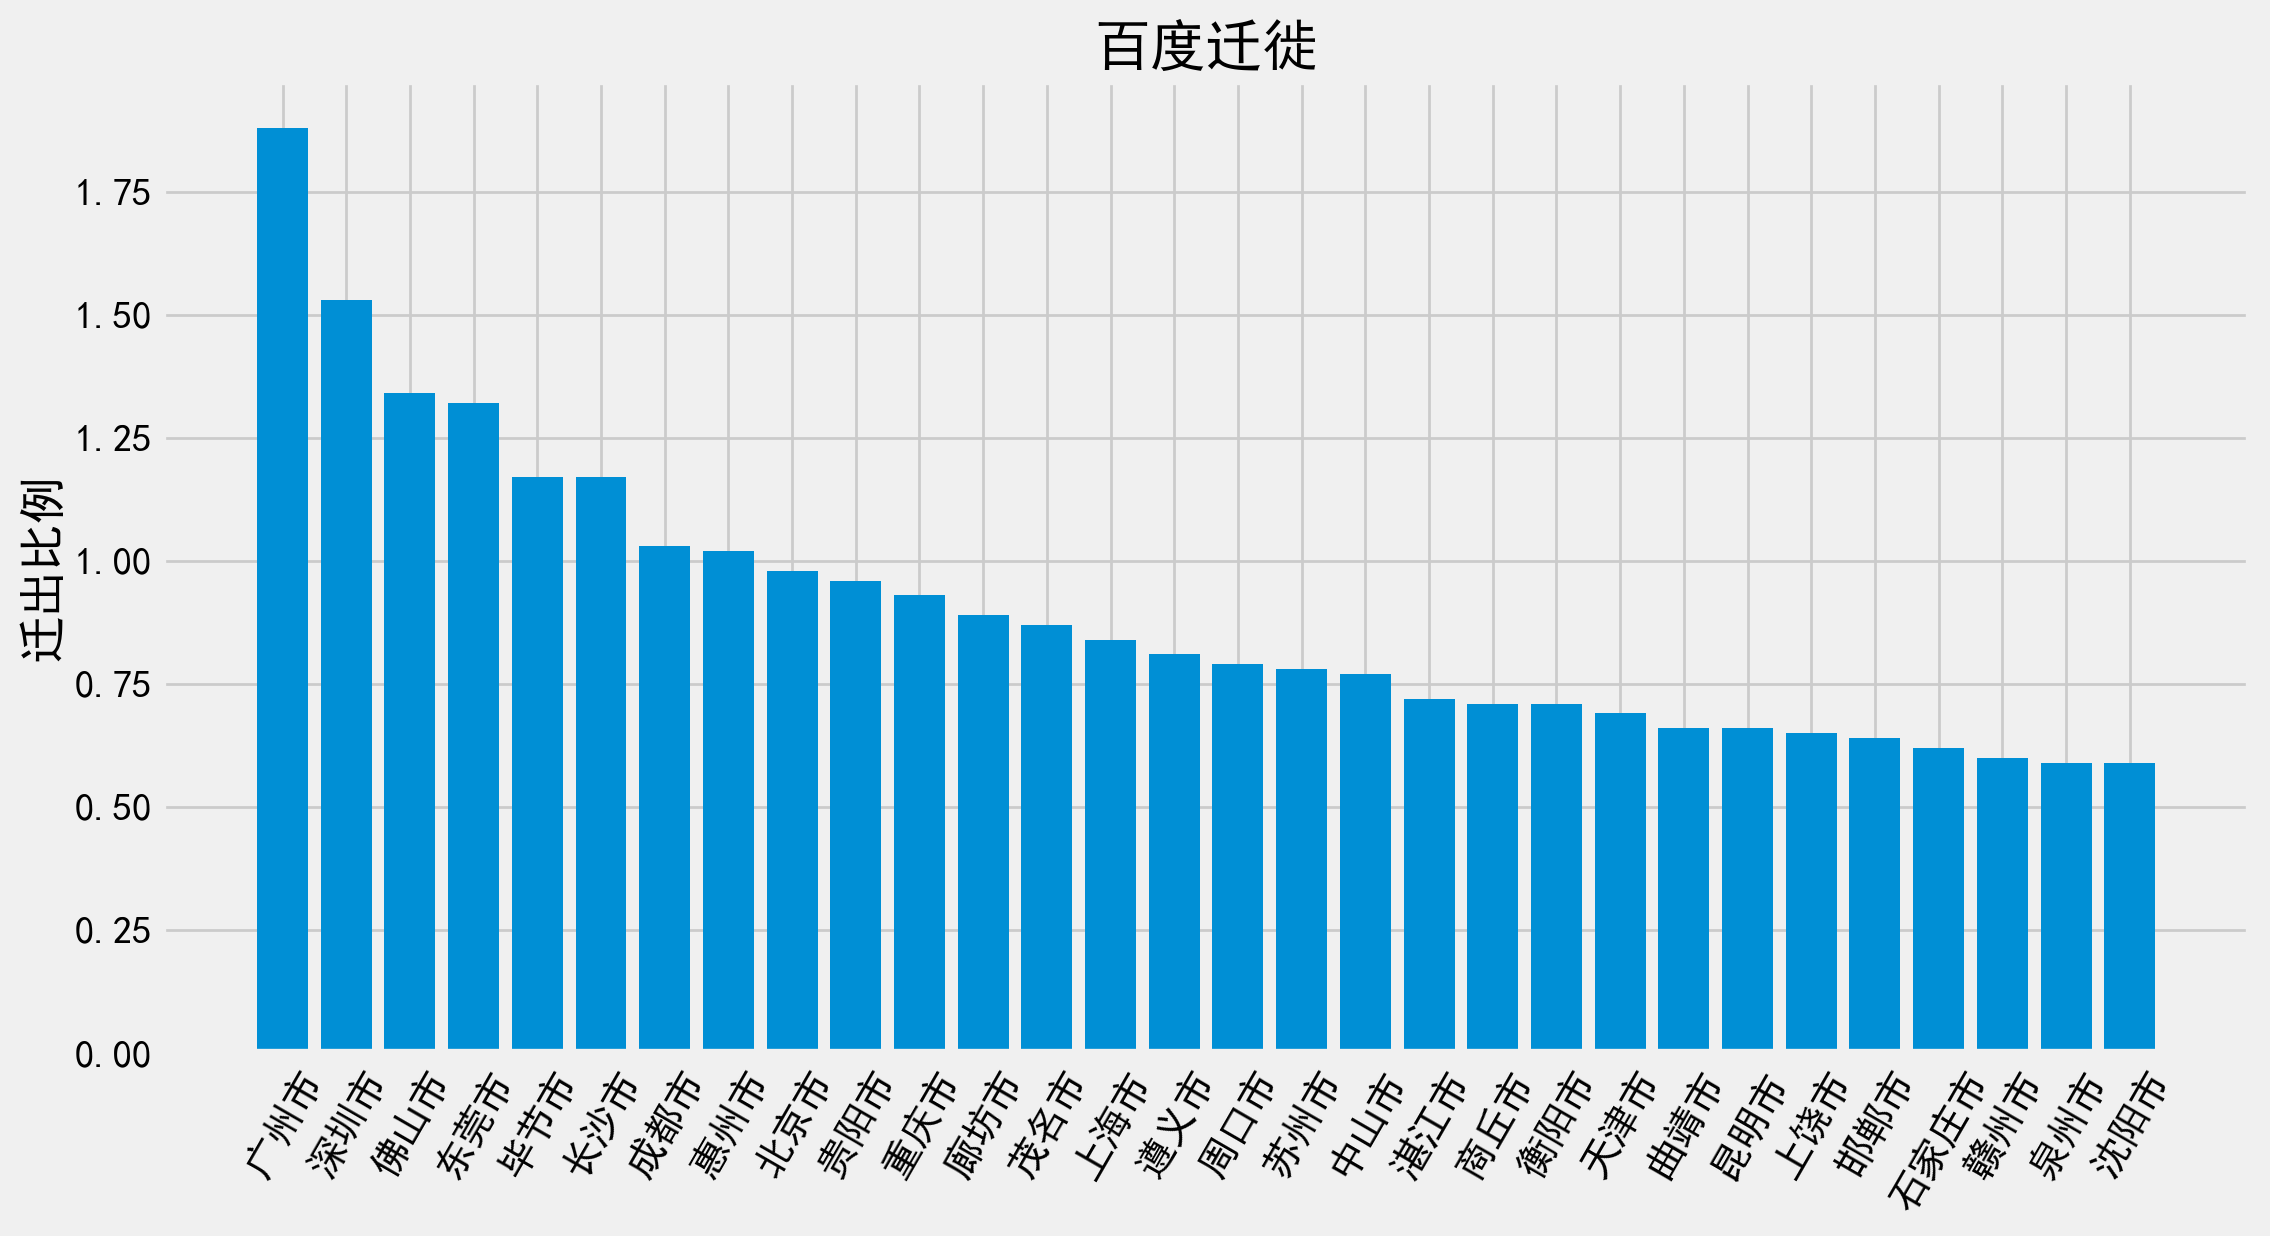

In [47]:
plt.figure(figsize=(12, 6),dpi = 200)
plt.bar(height = epidemic_baidu_df['value'], x= epidemic_baidu_df['city_name'])
plt.ylabel('迁出比例')
plt.title('百度迁徙')
plt.xticks(rotation=60);

In [293]:
epidemic_hist_province_df = ak.epidemic_hist_province(province="江苏")
print(epidemic_hist_province_df)

          Date Province  Confirmed  Dead  Cured  Severe  Critical  \
0   2020-02-15      江苏省        617     1    190       6         4   
1   2020-02-14      江苏省        604     1    160       6         4   
2   2020-02-13      江苏省        593     1    137       6         4   
3   2020-02-12      江苏省        570     1    131       6         3   
4   2020-02-11      江苏省        543     0     94       6         3   
..         ...      ...        ...   ...    ...     ...       ...   
20  2020-01-26      江苏省         47     0      1       1         0   
21  2020-01-25      江苏省         31     0      1       1         0   
22  2020-01-24      江苏省         18     0      1       1         0   
23  2020-01-23      江苏省          9     0      1       1         0   
24  2020-01-22      江苏省          1     0      1       1         0   

    CloseContact  Obse  UnObse  
0          12224  3375    8849  
1          12062  4005    8057  
2          11849  4309    7540  
3          11522  4553    6969  
4     

In [299]:
epidemic_hist_province_df.to_excel('jiangsu_observe.xlsx')

In [294]:
epidemic_hist_province_df = epidemic_hist_province_df.sort_values(by = 'Date')

In [295]:
import numpy as np
epidemic_hist_province_df['Obse'][epidemic_hist_province_df['Obse'] == 0] = np.nan
epidemic_hist_province_df['CloseContact'][epidemic_hist_province_df['CloseContact'] == 0] = np.nan
epidemic_hist_province_df['UnObse'][epidemic_hist_province_df['UnObse'] == 0] = np.nan

epidemic_hist_province_df = epidemic_hist_province_df.fillna(method='ffill')

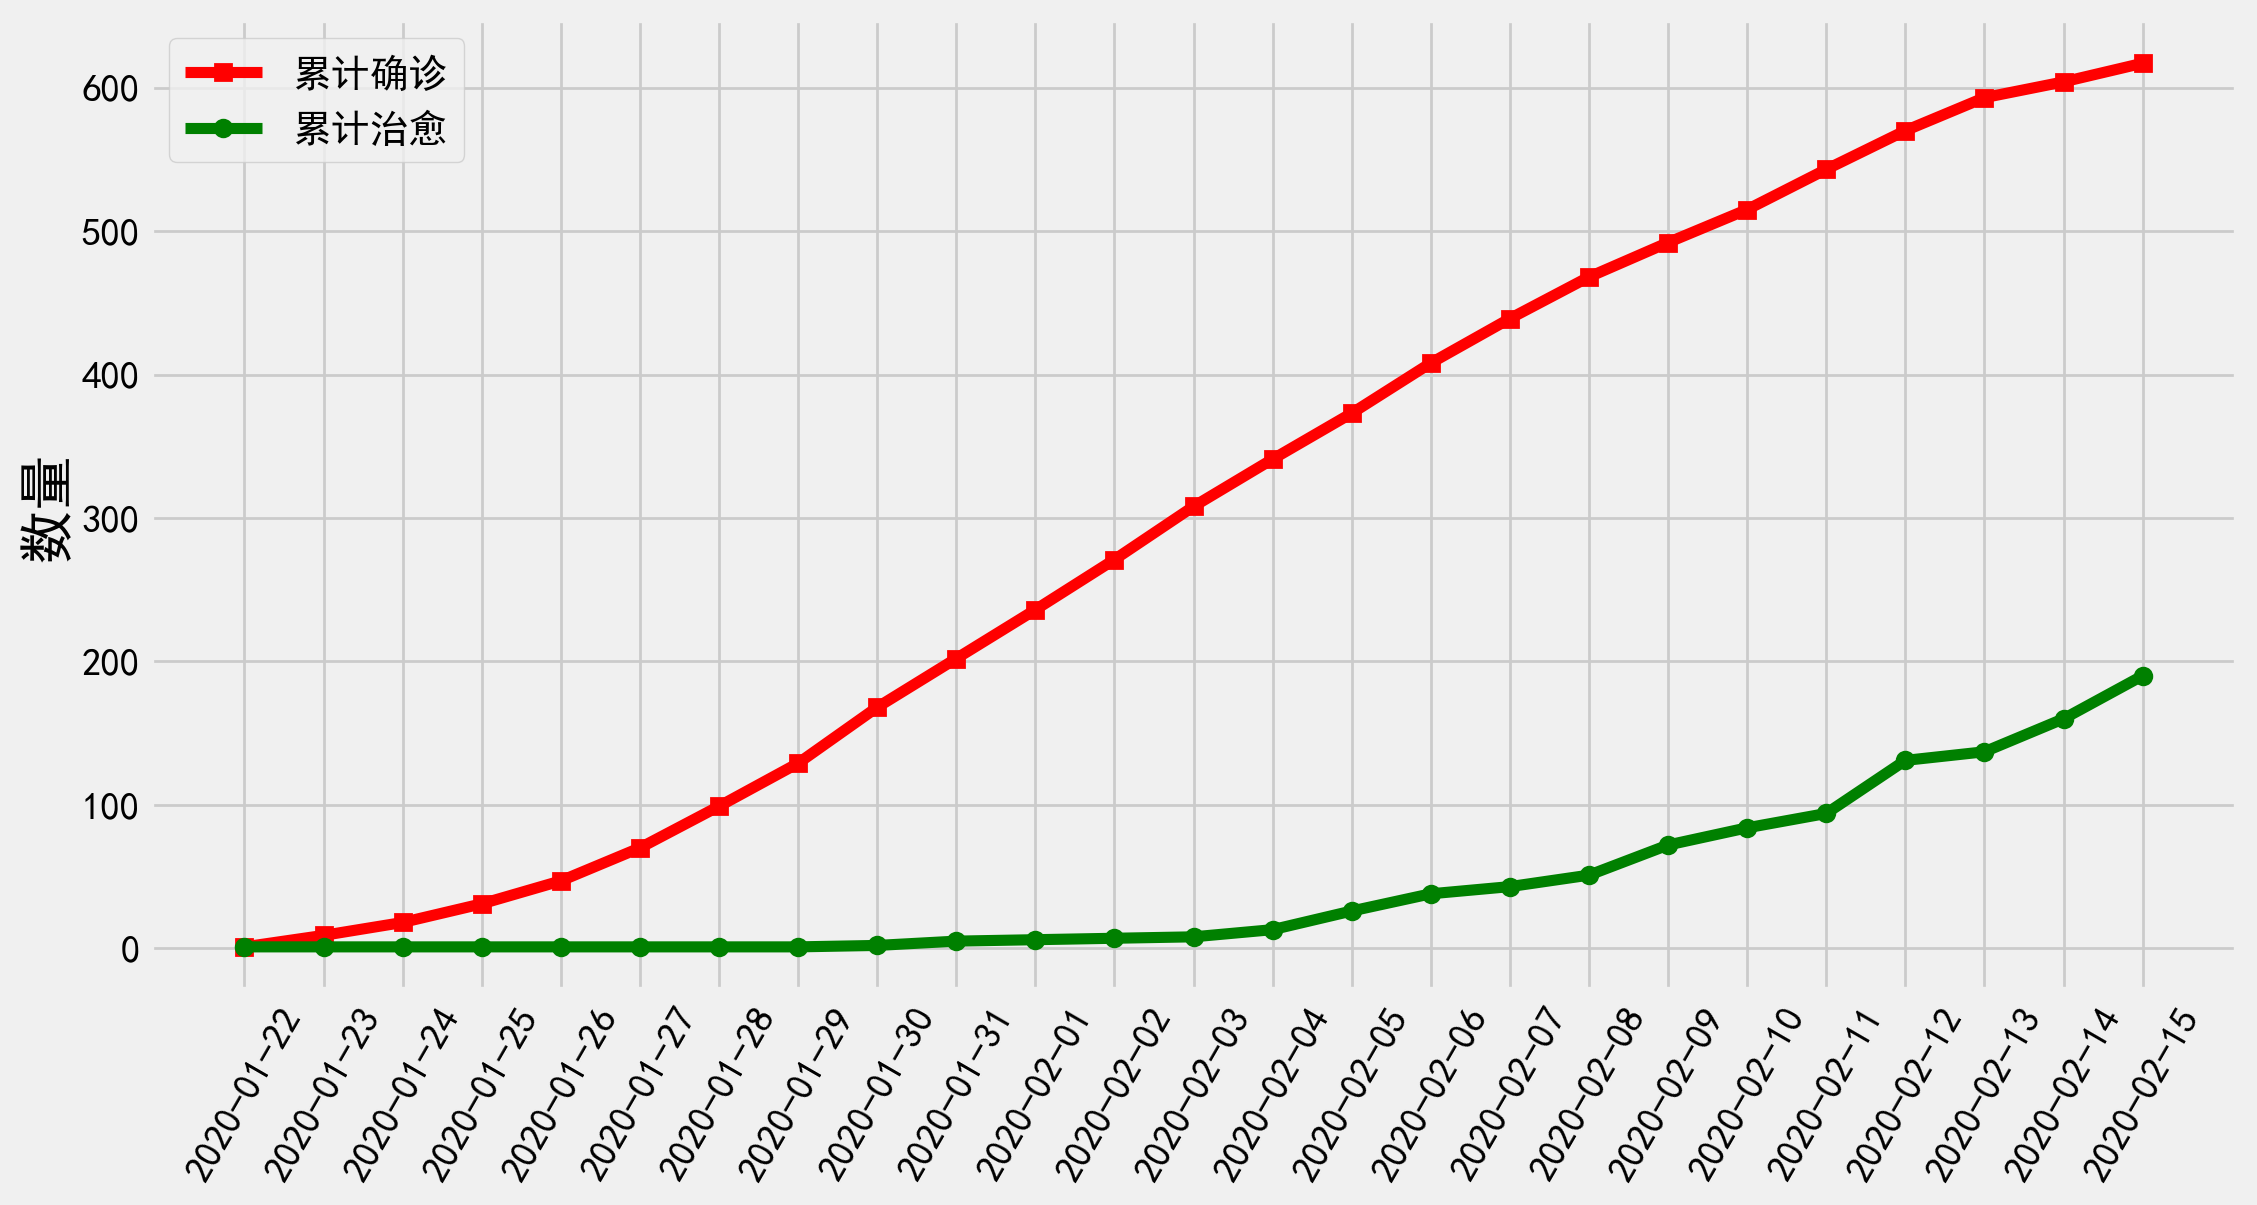

In [296]:
plt.figure(figsize=(12, 6), dpi = 200)
plt.style.use('fivethirtyeight')
plt.plot(epidemic_hist_province_df['Date'], epidemic_hist_province_df['Confirmed'],
         'r-s', label = '累计确诊')
plt.plot(epidemic_hist_province_df['Date'], epidemic_hist_province_df['Cured'],
         'g-o', label = '累计治愈')

plt.legend()
# plt.yscale('log')
plt.xticks(rotation=60)
plt.ylabel('数量', fontsize = 20)
plt.show()

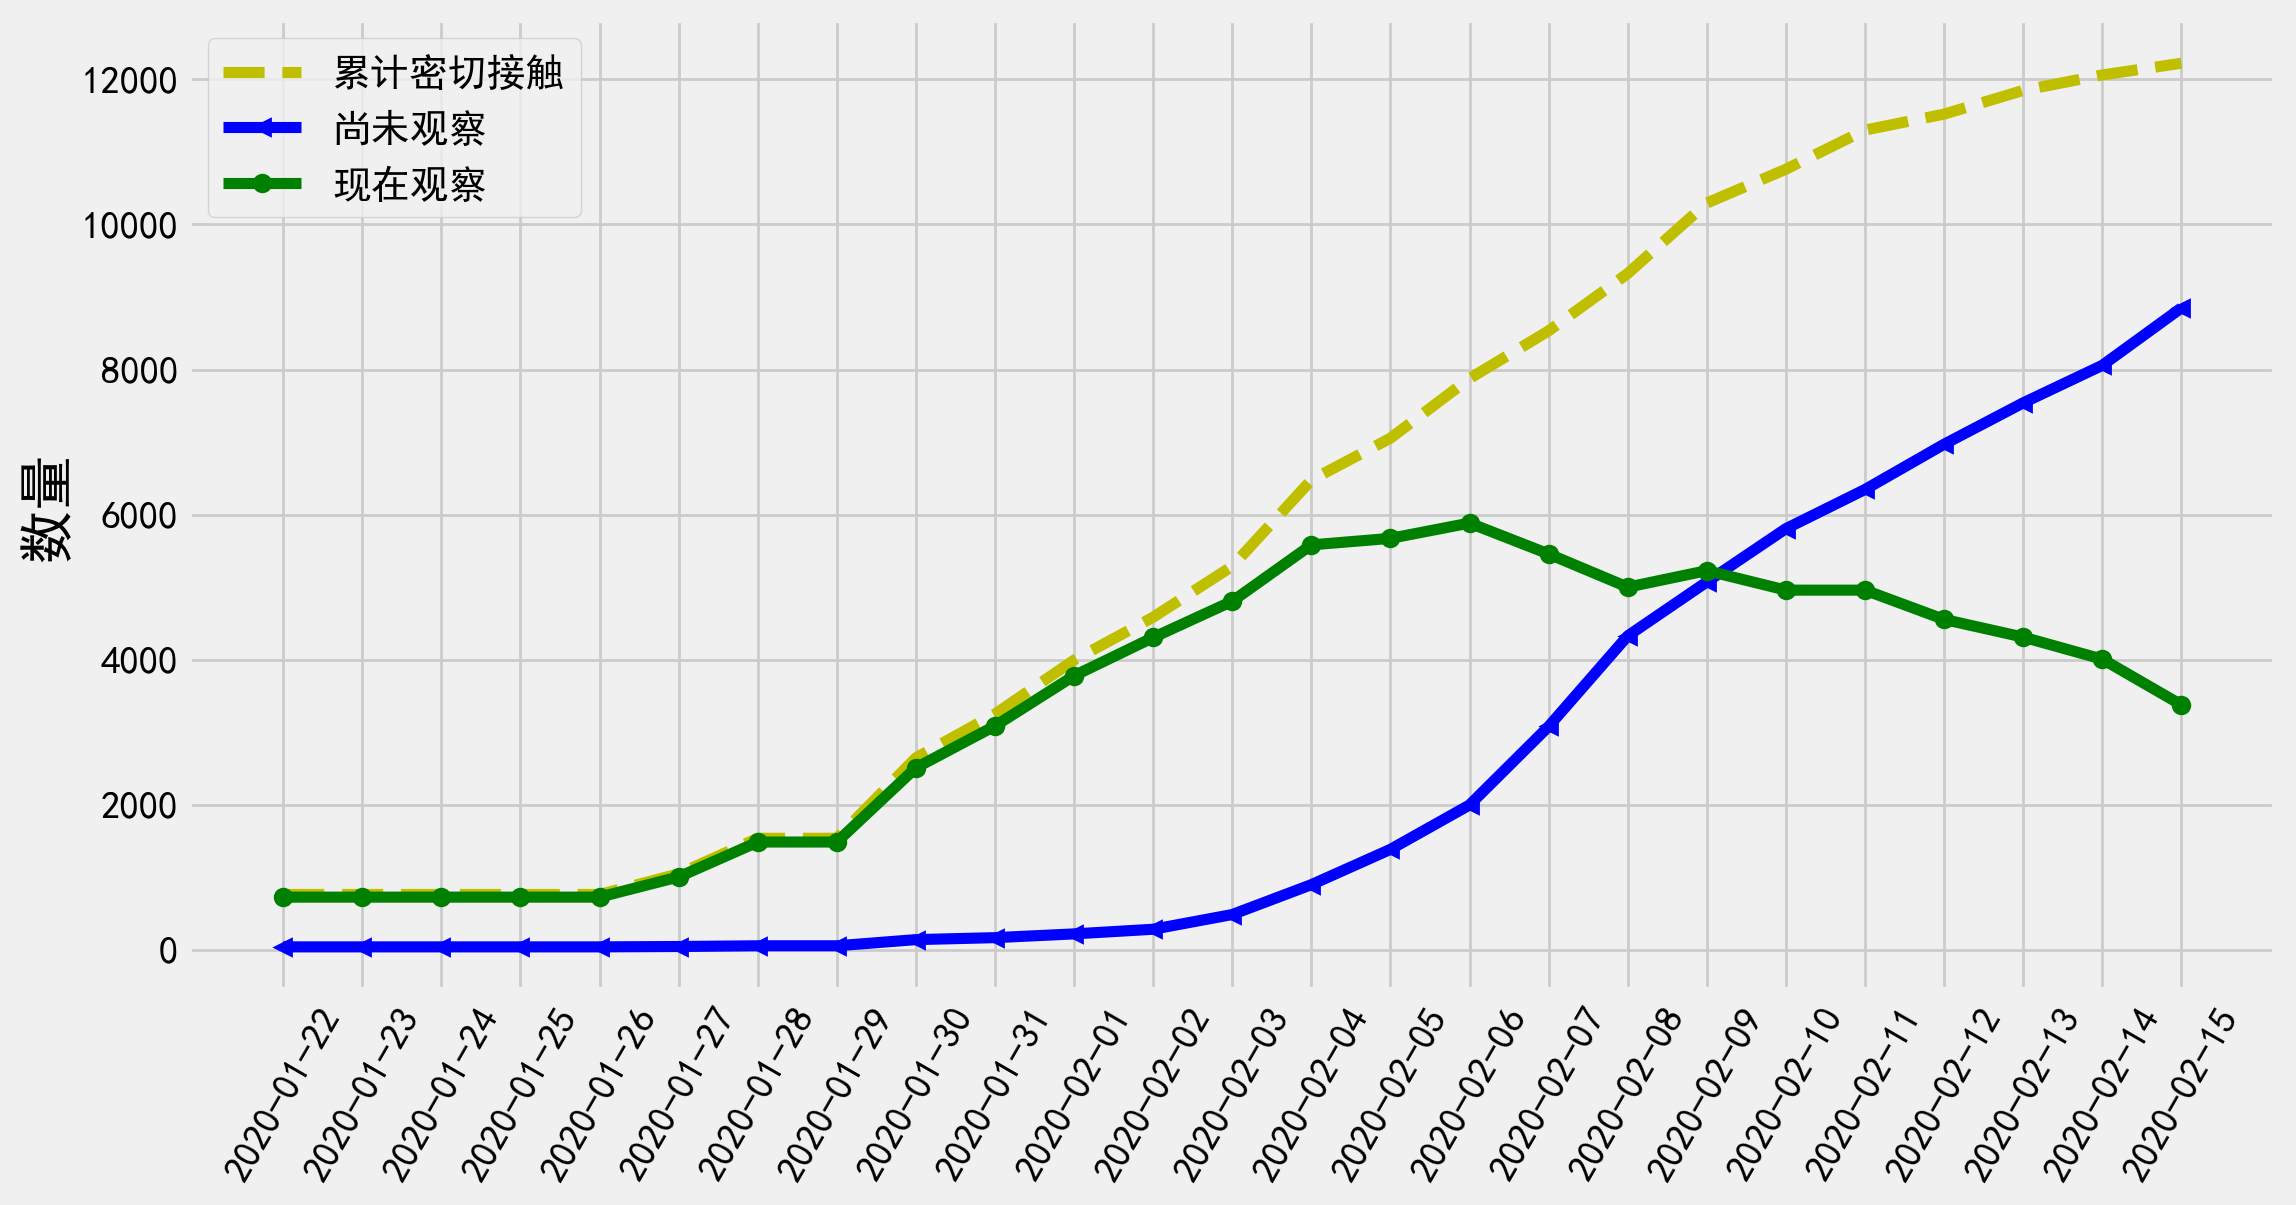

In [297]:
plt.figure(figsize=(12, 6), dpi = 200)
plt.style.use('fivethirtyeight')
plt.plot(epidemic_hist_province_df['Date'], epidemic_hist_province_df['CloseContact'],
         'y--', label = '累计密切接触')
plt.plot(epidemic_hist_province_df['Date'], epidemic_hist_province_df['UnObse'],
         'b-<', label = '尚未观察')
plt.plot(epidemic_hist_province_df['Date'], epidemic_hist_province_df['Obse'],
         'g-o', label = '现在观察')

plt.legend()
plt.xticks(rotation=60)
plt.ylabel('数量', fontsize = 20)
plt.show()

In [85]:
ak.epidemic_dxy(indicator="全国-疫情疑似-确诊趋势图")

In [87]:
ak.epidemic_dxy(indicator="疫情地图")

In [90]:
help(ak.epidemic_area_detail)

Help on function epidemic_area_detail in module akshare.event.sos:

epidemic_area_detail()
    细化到每个小区的确诊人数
    需要遍历每个页面, 如非必要, 请勿运行
    https://ncov.html5.qq.com/community?channelid=1&from=singlemessage&isappinstalled=0
    :return: 全国每个小区的确诊人数
    :rtype: pandas.DataFrame



In [165]:
import akshare as ak
epidemic_area_detail_df = ak.epidemic_area_detail()
print(epidemic_area_detail_df)

一共1070, 正在下载第1页
一共1070, 正在下载第2页
一共1070, 正在下载第3页
一共1070, 正在下载第4页
一共1070, 正在下载第5页
一共1070, 正在下载第6页
一共1070, 正在下载第7页
一共1070, 正在下载第8页
一共1070, 正在下载第9页
一共1070, 正在下载第10页
一共1070, 正在下载第11页
一共1070, 正在下载第12页
一共1070, 正在下载第13页
一共1070, 正在下载第14页
一共1070, 正在下载第15页
一共1070, 正在下载第16页
一共1070, 正在下载第17页
一共1070, 正在下载第18页
一共1070, 正在下载第19页
一共1070, 正在下载第20页
一共1070, 正在下载第21页
一共1070, 正在下载第22页
一共1070, 正在下载第23页
一共1070, 正在下载第24页
一共1070, 正在下载第25页
一共1070, 正在下载第26页
一共1070, 正在下载第27页
一共1070, 正在下载第28页
一共1070, 正在下载第29页
一共1070, 正在下载第30页
一共1070, 正在下载第31页
一共1070, 正在下载第32页
一共1070, 正在下载第33页
一共1070, 正在下载第34页
一共1070, 正在下载第35页
一共1070, 正在下载第36页
一共1070, 正在下载第37页
一共1070, 正在下载第38页
一共1070, 正在下载第39页
一共1070, 正在下载第40页
一共1070, 正在下载第41页
一共1070, 正在下载第42页
一共1070, 正在下载第43页
一共1070, 正在下载第44页
一共1070, 正在下载第45页
一共1070, 正在下载第46页
一共1070, 正在下载第47页
一共1070, 正在下载第48页
一共1070, 正在下载第49页
一共1070, 正在下载第50页
一共1070, 正在下载第51页
一共1070, 正在下载第52页
一共1070, 正在下载第53页
一共1070, 正在下载第54页
一共1070, 正在下载第55页
一共1070, 正在下载第56页
一共1070, 正在下载第57页
一共1070, 正在下载第58页
一共1070, 正在下载第59页
一共1070

一共1070, 正在下载第463页
一共1070, 正在下载第464页
一共1070, 正在下载第465页
一共1070, 正在下载第466页
一共1070, 正在下载第467页
一共1070, 正在下载第468页
一共1070, 正在下载第469页
一共1070, 正在下载第470页
一共1070, 正在下载第471页
一共1070, 正在下载第472页
一共1070, 正在下载第473页
一共1070, 正在下载第474页
一共1070, 正在下载第475页
一共1070, 正在下载第476页
一共1070, 正在下载第477页
一共1070, 正在下载第478页
一共1070, 正在下载第479页
一共1070, 正在下载第480页
一共1070, 正在下载第481页
一共1070, 正在下载第482页
一共1070, 正在下载第483页
一共1070, 正在下载第484页
一共1070, 正在下载第485页
一共1070, 正在下载第486页
一共1070, 正在下载第487页
一共1070, 正在下载第488页
一共1070, 正在下载第489页
一共1070, 正在下载第490页
一共1070, 正在下载第491页
一共1070, 正在下载第492页
一共1070, 正在下载第493页
一共1070, 正在下载第494页
一共1070, 正在下载第495页
一共1070, 正在下载第496页
一共1070, 正在下载第497页
一共1070, 正在下载第498页
一共1070, 正在下载第499页
一共1070, 正在下载第500页
一共1070, 正在下载第501页
一共1070, 正在下载第502页
一共1070, 正在下载第503页
一共1070, 正在下载第504页
一共1070, 正在下载第505页
一共1070, 正在下载第506页
一共1070, 正在下载第507页
一共1070, 正在下载第508页
一共1070, 正在下载第509页
一共1070, 正在下载第510页
一共1070, 正在下载第511页
一共1070, 正在下载第512页
一共1070, 正在下载第513页
一共1070, 正在下载第514页
一共1070, 正在下载第515页
一共1070, 正在下载第516页
一共1070, 正在下载第517页
一共1070, 正在

一共1070, 正在下载第919页
一共1070, 正在下载第920页
一共1070, 正在下载第921页
一共1070, 正在下载第922页
一共1070, 正在下载第923页
一共1070, 正在下载第924页
一共1070, 正在下载第925页
一共1070, 正在下载第926页
一共1070, 正在下载第927页
一共1070, 正在下载第928页
一共1070, 正在下载第929页
一共1070, 正在下载第930页
一共1070, 正在下载第931页
一共1070, 正在下载第932页
一共1070, 正在下载第933页
一共1070, 正在下载第934页
一共1070, 正在下载第935页
一共1070, 正在下载第936页
一共1070, 正在下载第937页
一共1070, 正在下载第938页
一共1070, 正在下载第939页
一共1070, 正在下载第940页
一共1070, 正在下载第941页
一共1070, 正在下载第942页
一共1070, 正在下载第943页
一共1070, 正在下载第944页
一共1070, 正在下载第945页
一共1070, 正在下载第946页
一共1070, 正在下载第947页
一共1070, 正在下载第948页
一共1070, 正在下载第949页
一共1070, 正在下载第950页
一共1070, 正在下载第951页
一共1070, 正在下载第952页
一共1070, 正在下载第953页
一共1070, 正在下载第954页
一共1070, 正在下载第955页
一共1070, 正在下载第956页
一共1070, 正在下载第957页
一共1070, 正在下载第958页
一共1070, 正在下载第959页
一共1070, 正在下载第960页
一共1070, 正在下载第961页
一共1070, 正在下载第962页
一共1070, 正在下载第963页
一共1070, 正在下载第964页
一共1070, 正在下载第965页
一共1070, 正在下载第966页
一共1070, 正在下载第967页
一共1070, 正在下载第968页
一共1070, 正在下载第969页
一共1070, 正在下载第970页
一共1070, 正在下载第971页
一共1070, 正在下载第972页
一共1070, 正在下载第973页
一共1070, 正在

In [167]:
epidemic_area_detail_df.to_csv('epidemic_area_detail.csv', index = False)

In [169]:
df = epidemic_area_detail_df[epidemic_area_detail_df['province']=='江苏省']

df.head()

province city district show_address            full_address  \
1623      江苏省  南通市      如皋市         春江花苑        江苏省南通市如皋市长江镇春江花苑   
1624      江苏省  南通市      如皋市        佘圩村8组       江苏省南通市如皋市江安镇佘圩村8组   
1625      江苏省  南通市      如皋市         皋南新村       江苏省南通市如皋市如城街道皋南新村   
1626      江苏省  南通市      如皋市         凌青8组       江苏省南通市如皋市如城街道凌青8组   
1627      江苏省  南通市      海安市       金海国际花园  江苏省南通市海安市高新区中城街道金海国际花园   

     cnt_sum_certain  
1623               3  
1624               1  
1625               1  
1626               2  
1627               1

In [176]:
epidemic_area_detail_df['cnt_sum_certain'].describe()

count    4331.000000
mean        1.669130
std         4.568667
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       256.000000
Name: cnt_sum_certain, dtype: float64

In [171]:
import numpy as np

In [173]:
epidemic_area_detail_df['cnt_sum_certain'].unique()

array(['2', '4', '1', '-1', '3', '5', '7', '10', '6', '8', '9', '12',
       '14', '19', '13', '11', '256', '119', '31', '15', '22', '16', '39',
       '17', '23'], dtype=object)

In [174]:
vlist = []
for i in epidemic_area_detail_df['cnt_sum_certain']:
    if i != '-1':
        vlist.append(int(i))
    else:
        vlist.append(np.nan)
epidemic_area_detail_df['cnt_sum_certain'] = vlist

In [177]:
np.nansum(vlist)

7229.0

In [178]:
epidemic_area_detail_df[epidemic_area_detail_df['cnt_sum_certain']==256]

province city district show_address   full_address  cnt_sum_certain
5954      湖北省  鄂州市      鄂城区         凤凰街道  湖北省鄂州市鄂城区凤凰街道            256.0

In [180]:
np.nanmax(vlist)

256.0

In [181]:
epidemic_area_detail_df[epidemic_area_detail_df['cnt_sum_certain']==np.nanmax(vlist)]

province city district show_address   full_address  cnt_sum_certain
5954      湖北省  鄂州市      鄂城区         凤凰街道  湖北省鄂州市鄂城区凤凰街道            256.0

In [92]:
help(ak.epidemic_hist_all)

Help on function epidemic_hist_all in module akshare.event.sos:

epidemic_hist_all()
    NCP细化到地市的细颗粒数据
    https://github.com/norratek/Ncov2020HistoryData
    https://docs.google.com/spreadsheets/d/1JNQnFYJpR7PxQo5K5lwXTuE0F6jprhMXuy7DPnV9H90/edit#gid=0
    :return: 返回每日的历史数据
    :rtype: pandas.DataFrame



In [268]:
epidemic_hist_all_df = ak.epidemic_hist_all()
print(epidemic_hist_all_df)

2020-02-15
2020-02-14
2020-02-13
2020-02-12
2020-02-11
2020-02-10
2020-02-09
2020-02-08
2020-02-07
2020-02-06
2020-02-05
2020-02-04
2020-02-03
2020-02-02
2020-02-01
2020-01-31
2020-01-30
2020-01-29
2020-01-28
2020-01-27
2020-01-26
2020-01-25
2020-01-24
2020-01-23
    Province  City  Confirmed  Dead  Cured  Severe  Critical        date
0        安徽省    合肥        169     0      0       0         0  2020-02-15
1        安徽省    蚌埠        157     0      0       0         0  2020-02-15
2        安徽省    阜阳        152     0      0       0         0  2020-02-15
3        安徽省    亳州        108     0      0       0         0  2020-02-15
4        安徽省    安庆         82     0      0       0         0  2020-02-15
..       ...   ...        ...   ...    ...     ...       ...         ...
133       新疆  乌鲁木齐          2     0      0       0         0  2020-01-23
134      甘肃省    兰州          1     0      0       0         0  2020-01-23
135       香港    香港          2     0      0       0         0  2020-01-23
136   

In [270]:
epidemic_hist_province_df = ak.epidemic_hist_province(province="湖北")
epidemic_hist_province_df

Date Province  Confirmed  Dead  Cured  Severe  Critical  \
0   2020-02-15      湖北省      32767  1596   5623    8439      1957   
1   2020-02-14      湖北省      32767  1457   4774    8276      1876   
2   2020-02-13      湖北省      32767     1      1    7593      1685   
3   2020-02-12      湖北省      32767  1310   3441    5647      1437   
4   2020-02-11      湖北省      32767  1068   2639    5724      1517   
..         ...      ...        ...   ...    ...     ...       ...   
27  2020-01-19      湖北省        198     0      0       0         0   
28  2020-01-18      湖北省        121     0      0       0         0   
29  2020-01-17      湖北省         62     0      0       0         0   
30  2020-01-16      湖北省         45     0      0       0         0   
31  2020-01-15      湖北省         41     0      0       0         0   

    CloseContact   Obse  UnObse  
0          32767  32767       1  
1          32767  32767       1  
2          32767  32767       1  
3          32767  32767       1  
4          32767  32767       1  
..           ...    ...     ...  
27             0      0       0  
28             0      0       0  
29             0      0       0  
30             0      0       0  
31             0      0       0  

[32 rows x 10 columns]

In [269]:
epidemic_hist_all_df = epidemic_hist_all_df.sort_values(by='date')
js = epidemic_hist_all_df[epidemic_hist_all_df['Province']=='江苏省']
js.head()

Province City  Confirmed  Dead  Cured  Severe  Critical        date
128      江苏省   扬州          1     0      0       0         0  2020-01-23
127      江苏省  连云港          1     0      0       0         0  2020-01-23
125      江苏省   苏州          2     0      0       0         0  2020-01-23
124      江苏省   无锡          1     0      0       0         0  2020-01-23
123      江苏省   南京          3     0      0       0         0  2020-01-23

In [100]:
js[js['City']=='南京']

Province City  Confirmed  Dead  Cured  Severe  Critical        date
123      江苏省   南京          3     0      0       0         0  2020-01-23
174      江苏省   南京          4     0      0       0         0  2020-01-24
214      江苏省   南京          7     0      0       0         0  2020-01-25
235      江苏省   南京          7     0      0       0         0  2020-01-26
86       江苏省   南京         10     0      0       0         0  2020-01-27
..       ...  ...        ...   ...    ...     ...       ...         ...
345      江苏省   南京         87     0     22       0         0  2020-02-11
255      江苏省   南京         90     0     24       0         0  2020-02-12
149      江苏省   南京         91     0     26       0         0  2020-02-13
148      江苏省   南京         91     0     27       0         0  2020-02-14
149      江苏省   南京         92     0     29       0         1  2020-02-15

[24 rows x 8 columns]

In [300]:
js['City'].unique()

array(['扬州', '连云港', '苏州', '无锡', '南京', '南通', '宿迁', '盐城', '常州', '泰州', '淮安',
       '徐州', '镇江'], dtype=object)

In [309]:
js['date'].unique()

array(['2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26',
       '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
       '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03',
       '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07',
       '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11',
       '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15'],
      dtype=object)

In [330]:
from collections import defaultdict
dic = defaultdict(lambda:dict())
for i in js['City'].unique():
    for j in js['date'].unique():
        dic[i][j]=0


In [331]:
js[js['City']=='南京']

Province City  Confirmed  Dead  Cured  Severe  Critical        date
123      江苏省   南京          3     0      0       0         0  2020-01-23
174      江苏省   南京          4     0      0       0         0  2020-01-24
214      江苏省   南京          7     0      0       0         0  2020-01-25
235      江苏省   南京          7     0      0       0         0  2020-01-26
86       江苏省   南京         10     0      0       0         0  2020-01-27
..       ...  ...        ...   ...    ...     ...       ...         ...
345      江苏省   南京         87     0     22       0         0  2020-02-11
255      江苏省   南京         90     0     24       0         0  2020-02-12
149      江苏省   南京         91     0     26       0         0  2020-02-13
148      江苏省   南京         91     0     27       0         0  2020-02-14
149      江苏省   南京         92     0     29       0         1  2020-02-15

[24 rows x 8 columns]

In [332]:
for i in js['City'].unique():
    datas = js[js['City']==i]
    for j in datas['date']:
        dic[i][j] = int(datas['Confirmed'][datas['date']==j])


In [334]:
datas = pd.DataFrame(dic)
datas.to_excel('jiangsu_citys_hist.xlsx')

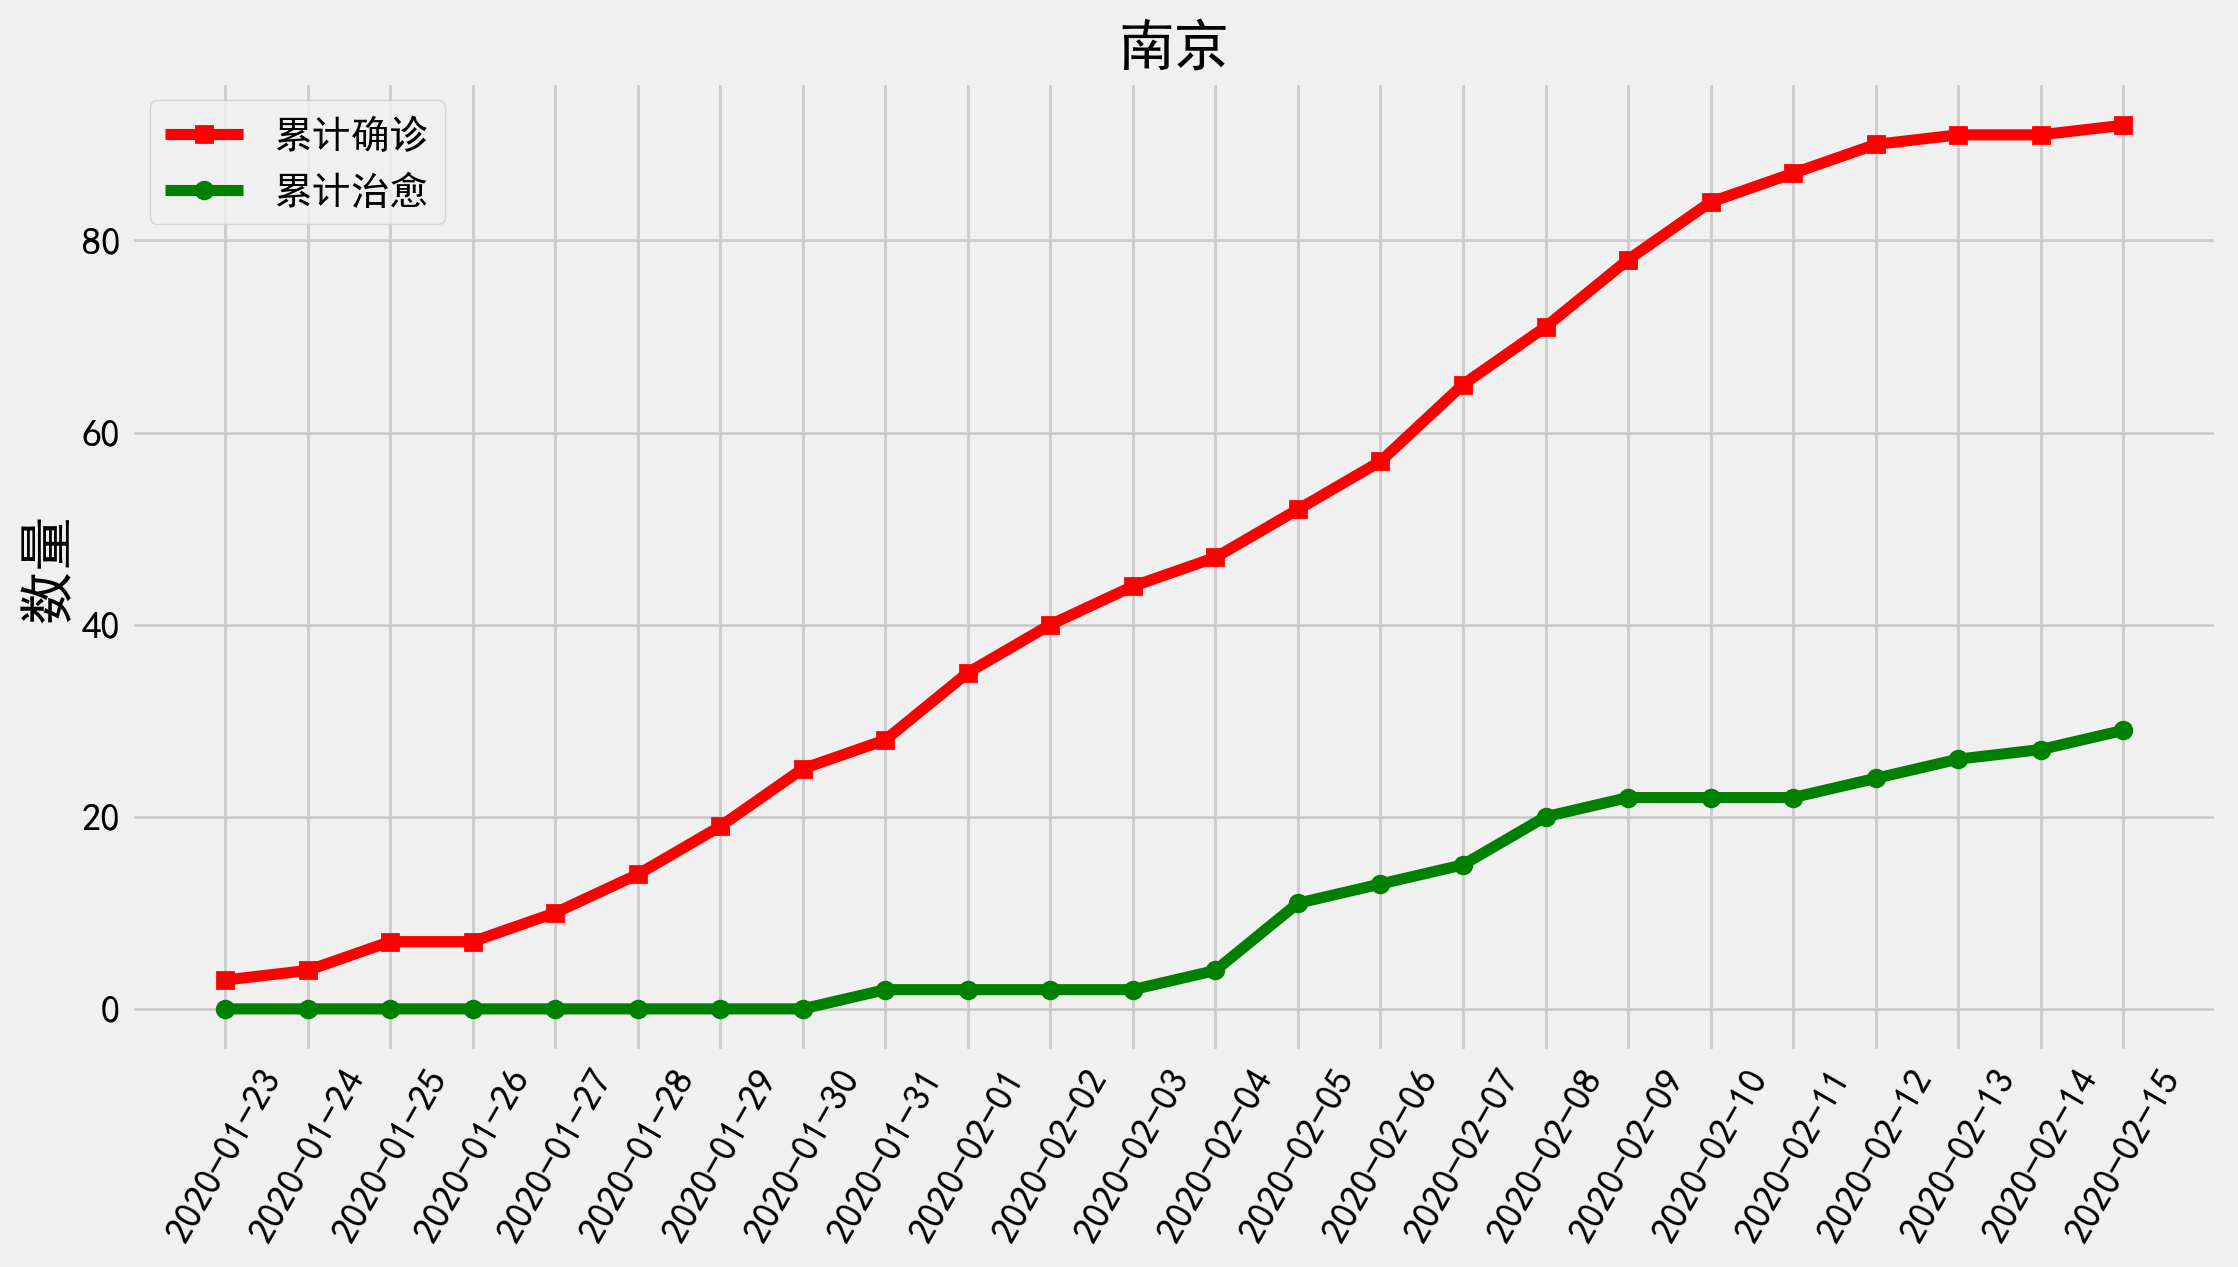

In [101]:
plt.figure(figsize=(12, 6), dpi = 200)
i = '南京'
df = js[js['City']==i]
plt.plot(df['date'], df['Confirmed'],
         'r-s', label = '累计确诊')
plt.plot(df['date'], df['Cured'],
         'g-o', label = '累计治愈')
plt.title(i, fontsize =20)
plt.legend()
# plt.yscale('log')
plt.xticks(rotation=60)
plt.ylabel('数量', fontsize = 20)
plt.show()

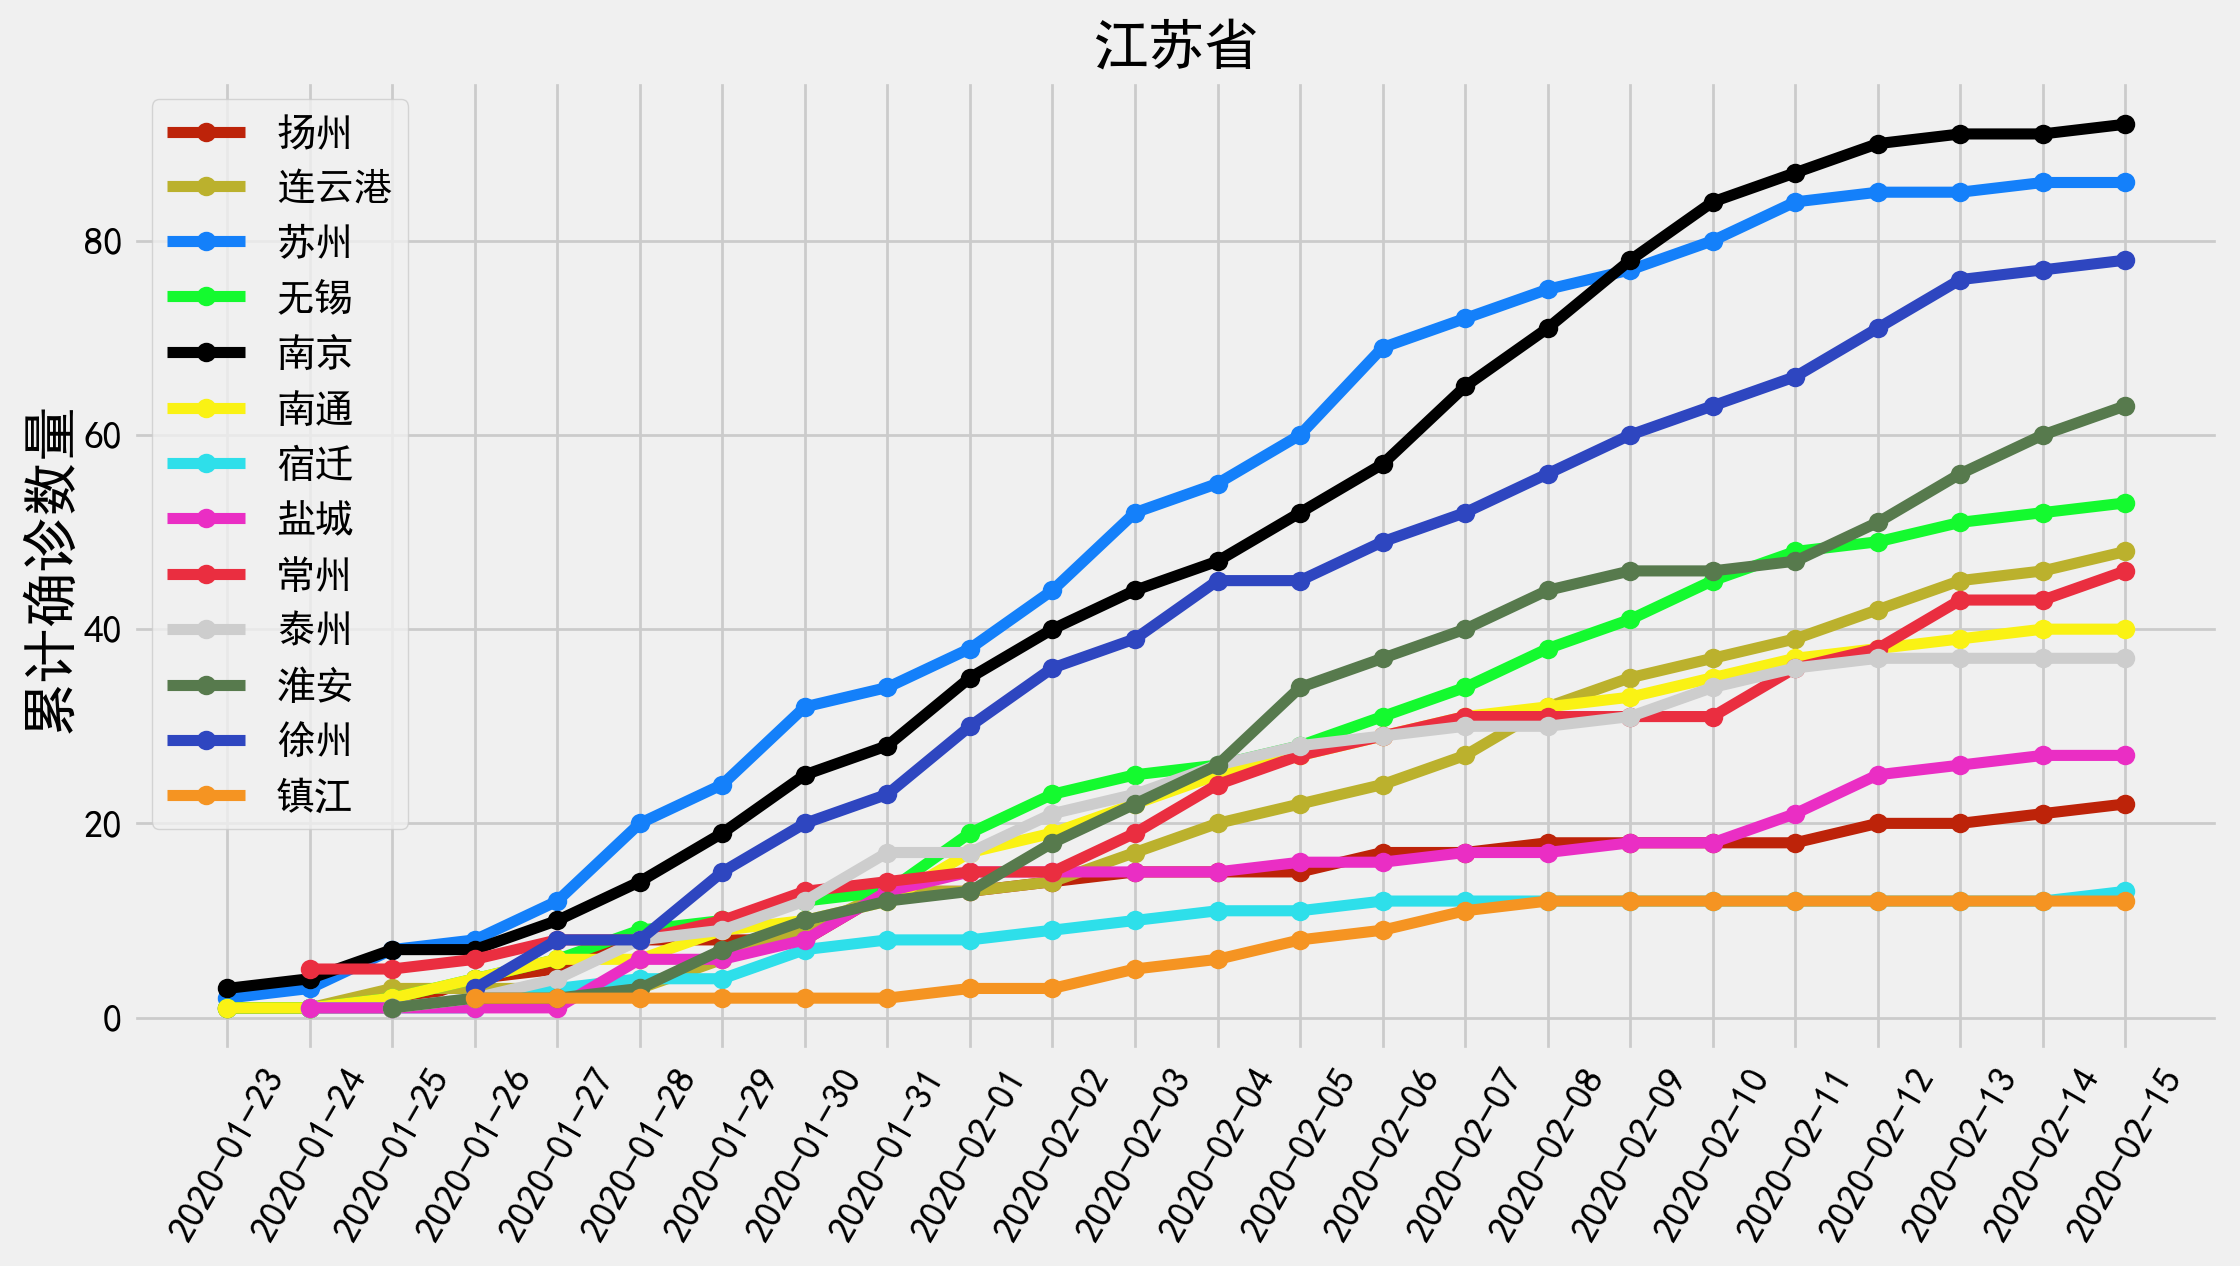

In [110]:
cols =  [ '#bd2309', '#bbb12d', '#1480fa', '#14fa2f', '#000000',
              '#faf214', '#2edfea', '#ea2ec4', '#ea2e40', '#cdcdcd',
              '#577a4d', '#2e46c0', '#f59422', '#219774', '#8086d9' ]
    
plt.figure(figsize=(12, 6), dpi = 200)
for k, i in enumerate(js['City'].unique()):
    df = js[js['City']==i]
    plt.plot(df['date'], df['Confirmed'], color= cols[k], marker='o', linestyle='-',
              label = i)
plt.title('江苏省', fontsize =20)
plt.legend()
# plt.yscale('log')
plt.xticks(rotation=60)
plt.ylabel('累计确诊数量', fontsize = 20)
plt.show()

# 微博指数

In [121]:
import akshare as ak
df_index = ak.weibo_index(word="新型冠状病毒", time_type="3month")
print(df_index)

             新型冠状病毒
index              
2019-11-17        0
2019-11-18        0
2019-11-19        0
2019-11-20        0
2019-11-21        0
...             ...
2020-02-13  3920738
2020-02-14  2783636
2020-02-15  2699038
2020-02-16  2999566
2020-02-17  3866888

[93 rows x 1 columns]


In [118]:
df_index2 = ak.weibo_index(word="李文亮", time_type="3month")
df_index3 = ak.weibo_index(word="肺炎", time_type="3month")

In [127]:
df_index4 = ak.weibo_index(word="武汉", time_type="3month")


In [132]:
df_index6 = ak.weibo_index(word="CDC", time_type="3month")

In [248]:
df_index7 = ak.weibo_index(word="钟南山", time_type="3month")

In [249]:
df_index8 = ak.weibo_index(word="口罩", time_type="3month")
df_index9 = ak.weibo_index(word="红十字会", time_type="3month")

In [158]:
df_index2 = ak.weibo_index(word="李文亮", time_type="3month")
df_index10 = ak.weibo_index(word="散装江苏", time_type="3month")


In [250]:
df_index5 = ak.weibo_index(word="疫情", time_type="3month")
df_index11 = ak.weibo_index(word="江苏", time_type="3month")
df_index12 = ak.weibo_index(word="湖北", time_type="3month")
df_index13 = ak.weibo_index(word="南京", time_type="3month")
df_index14 = ak.weibo_index(word="武汉", time_type="3month")

In [244]:
df_index15 = ak.weibo_index(word="武汉加油", time_type="3month")


In [264]:
df2 = pd.concat([df_index5, df_index14, df_index12, df_index11, df_index13],axis=1)
df2.to_excel('weboindex2.xlsx')

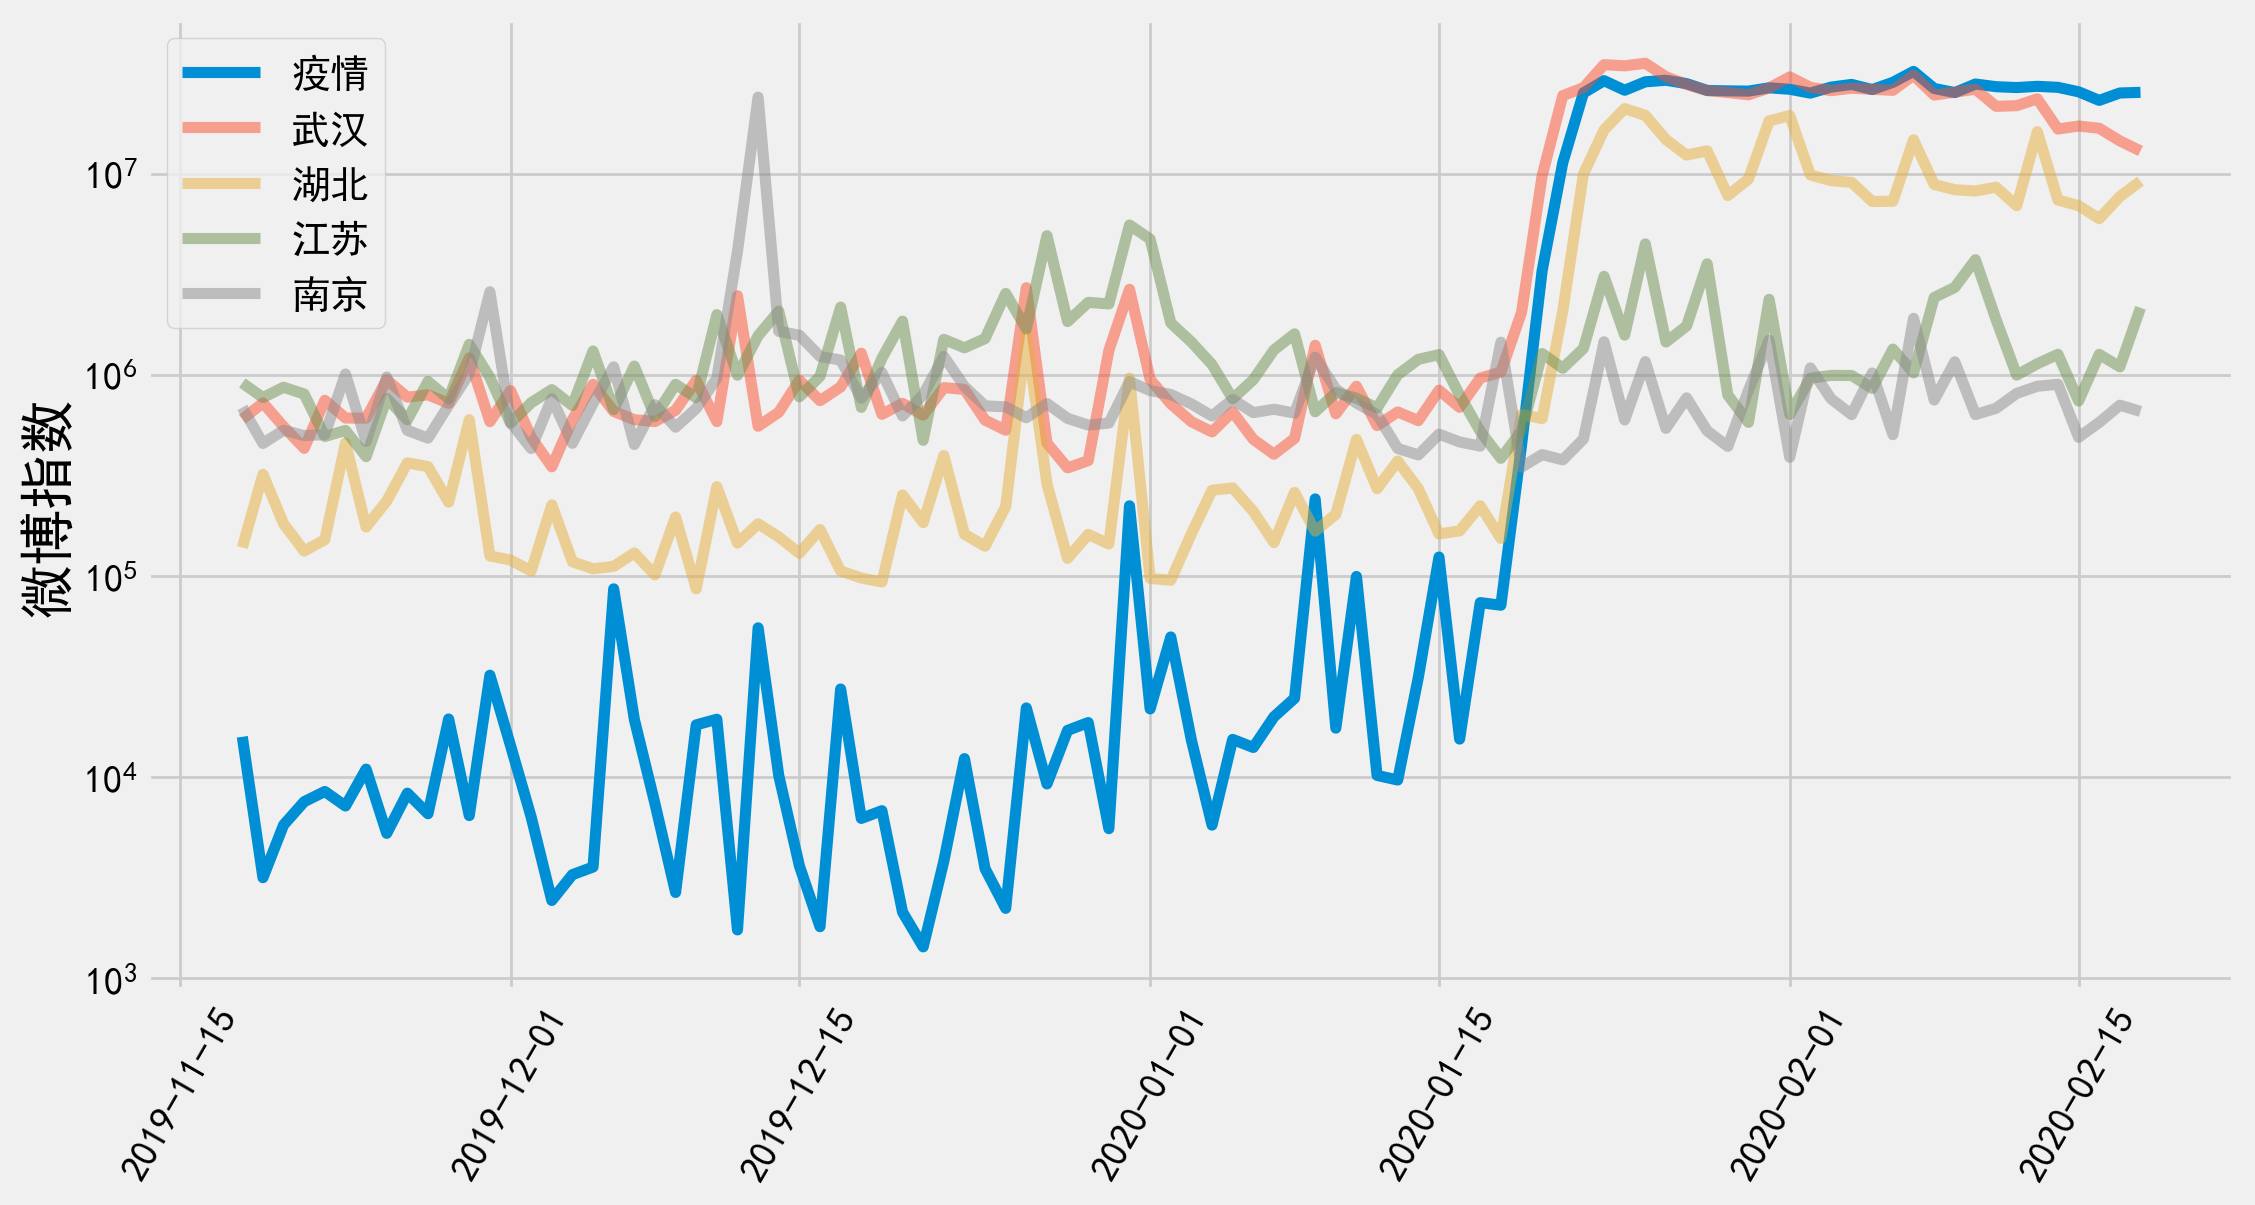

In [164]:
plt.figure(figsize=(12, 6), dpi = 200)
plt.plot(df_index5.index, df_index5, label = '疫情')
plt.plot(df_index14.index, df_index14, label = '武汉', alpha = 0.5)
plt.plot(df_index12.index, df_index12, label = '湖北', alpha = 0.5)
plt.plot(df_index11.index, df_index11, label = '江苏', alpha = 0.5)
plt.plot(df_index13.index, df_index13, label = '南京', alpha = 0.5)
plt.legend()
plt.yscale('log')
plt.xticks(rotation=60)
plt.ylabel('微博指数', fontsize = 20)
plt.show()

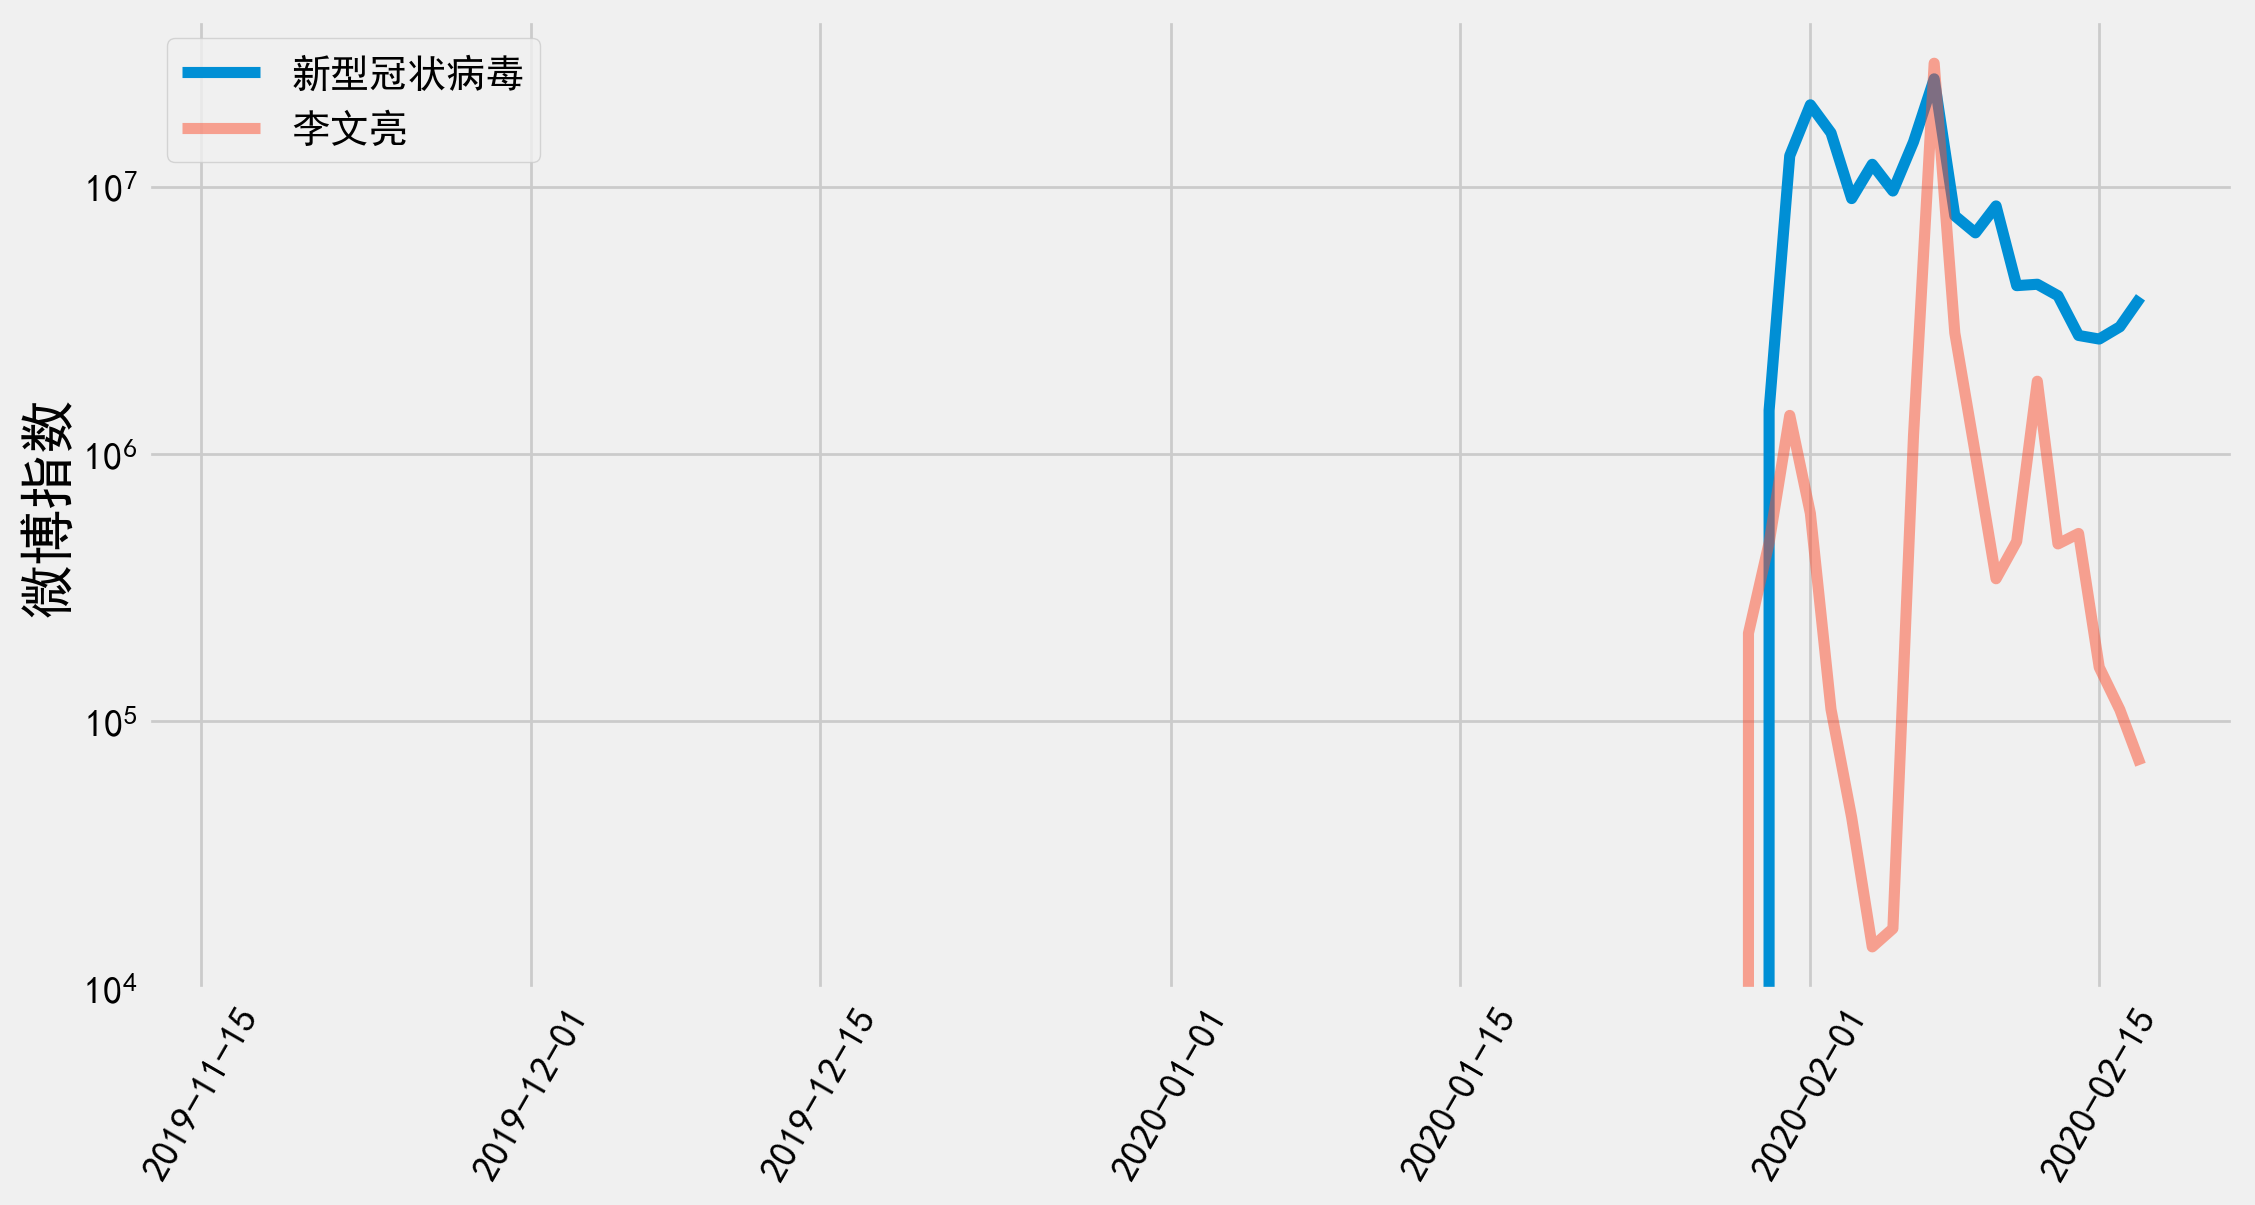

In [144]:
plt.figure(figsize=(12, 6), dpi = 200)

plt.plot(df_index.index, df_index, label = '新型冠状病毒')
plt.plot(df_index2.index, df_index2, label = '李文亮', alpha = 0.5)

plt.legend()
plt.yscale('log')
plt.xticks(rotation=60)
plt.ylabel('微博指数', fontsize = 20)
plt.show()

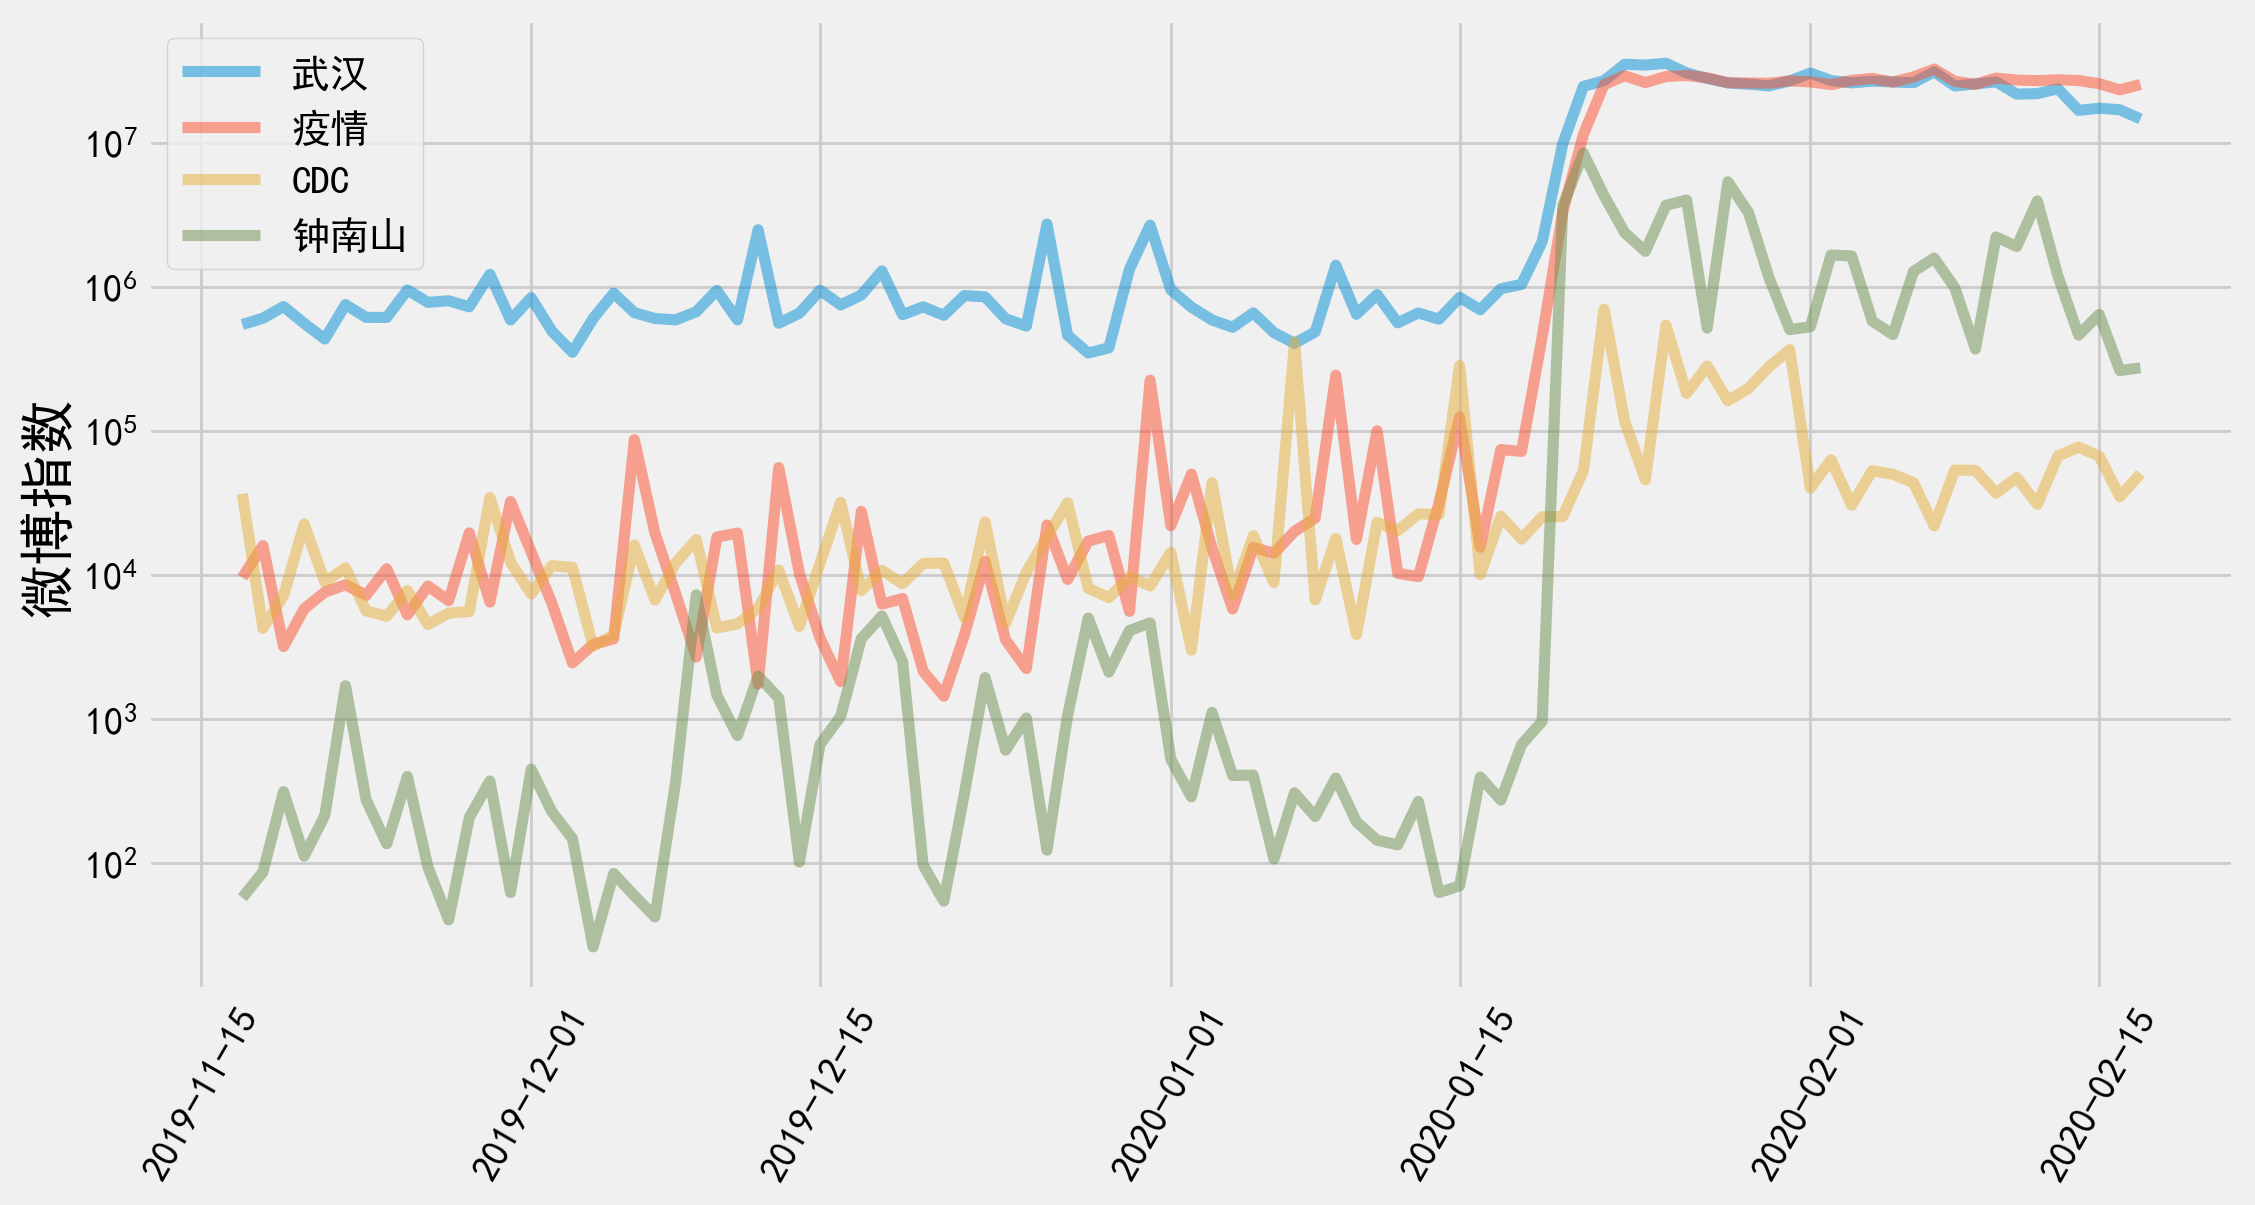

In [136]:
plt.figure(figsize=(12, 6), dpi = 200)
plt.plot(df_index4.index, df_index4, label = '武汉', alpha = 0.5)
plt.plot(df_index5.index, df_index5, label = '疫情', alpha = 0.5)
plt.plot(df_index6.index, df_index6, label = 'CDC', alpha = 0.5)
plt.plot(df_index7.index, df_index7, label = '钟南山', alpha = 0.5)

plt.legend()
plt.yscale('log')
plt.xticks(rotation=60)
plt.ylabel('微博指数', fontsize = 20)
plt.show()

In [260]:
df_index15

武汉加油
index              
2019-11-19        0
2019-11-20        0
2019-11-21        0
2019-11-22        0
2019-11-23        0
...             ...
2020-02-15  6655989
2020-02-16  5775161
2020-02-17  6375035
2020-02-18  3679263
2020-02-19  2519329

[93 rows x 1 columns]

In [261]:
df1 = pd.concat([df_index7, df_index8, df_index9, df_index5, df_index15],axis=1)
df1.to_excel('weboindex1.xlsx')

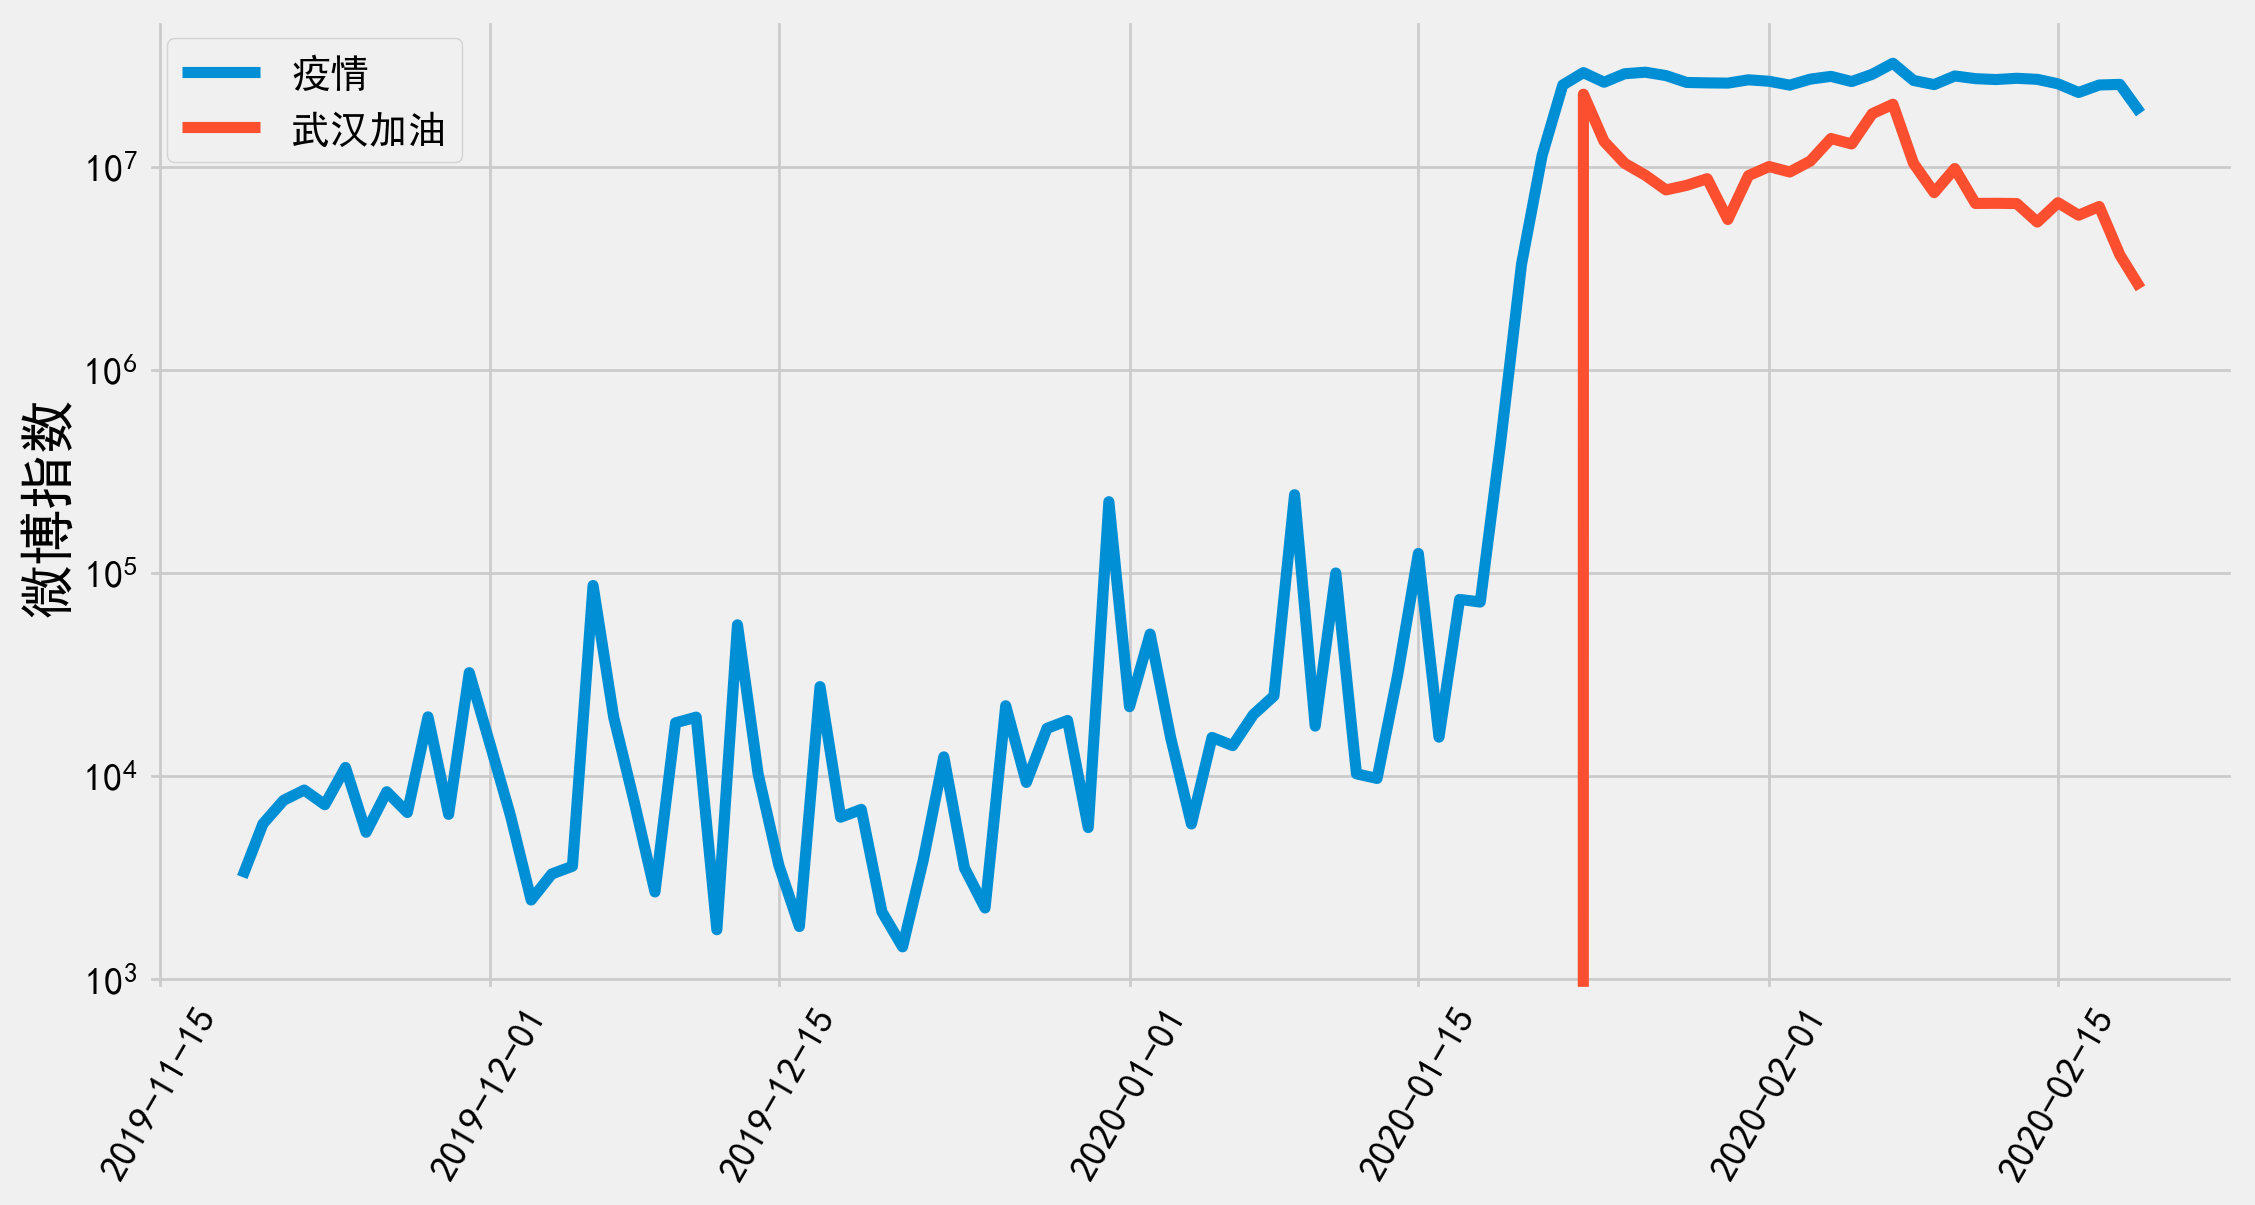

In [262]:
plt.figure(figsize=(12, 6), dpi = 200)
plt.plot(df_index5.index, df_index5, label = '疫情')
plt.plot(df_index15.index, df_index15, label = '武汉加油')

plt.legend()
plt.yscale('log')
plt.xticks(rotation=60)
plt.ylabel('微博指数', fontsize = 20)
plt.show()

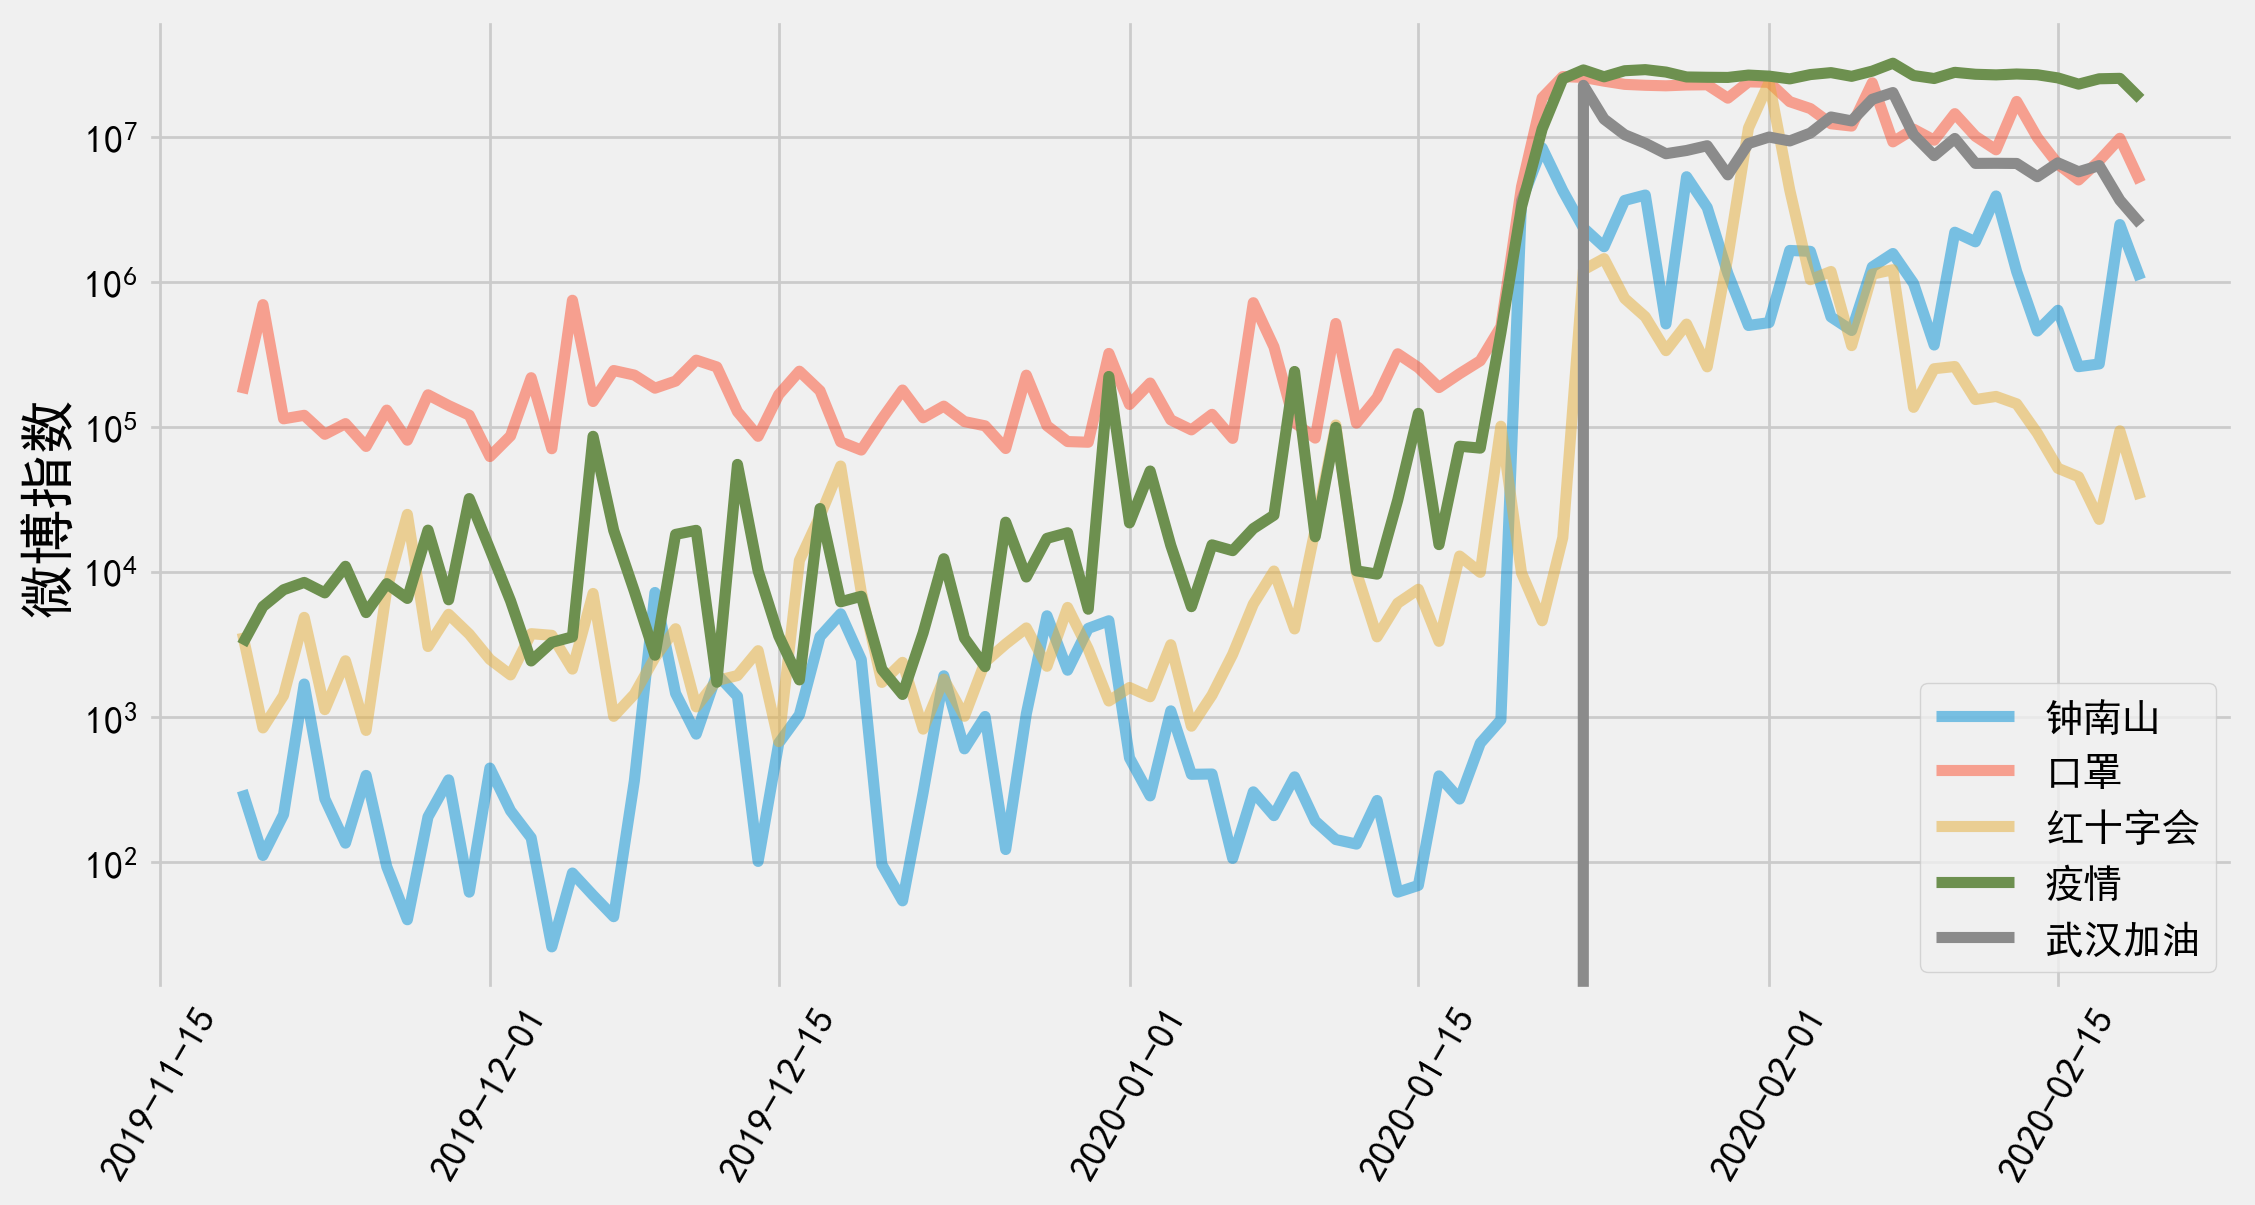

In [263]:
plt.figure(figsize=(12, 6), dpi = 200)
plt.plot(df_index7.index, df_index7, label = '钟南山', alpha = 0.5)
plt.plot(df_index8.index, df_index8, label = '口罩', alpha = 0.5)
plt.plot(df_index9.index, df_index9, label = '红十字会', alpha = 0.5)
plt.plot(df_index5.index, df_index5, label = '疫情')
plt.plot(df_index15.index, df_index15, label = '武汉加油')

plt.legend()
plt.yscale('log')
plt.xticks(rotation=60)
plt.ylabel('微博指数', fontsize = 20)
plt.show()

In [182]:
epidemic_trip_df = ak.epidemic_trip()
epidemic_trip_df.head()

date start end  type       no no_sub           memo    pos_start  \
0  2020-02-17               4  云GV5592                                 商丘   
1  2020-02-15               6  赣A79X51     南昌           1人确诊  朝农街道抚生路888号   
2  2020-02-12               6  湘A70Y26     长沙             不详       中江国际花城   
3  2020-02-11               3   哈尔滨1号线                  1人确诊         和兴路站   
4  2020-02-10               1   MU2416         东航MU2416 1人确诊           北京   

   pos_end                                             source          who  
0       云南        https://news.dahe.cn/2020/02-18/599067.html    大河报·大河客户端  
1       南昌  http://jx.sina.com.cn/news/b/2020-02-18/detail...    江西省政务信息公开  
2  长沙市中心医院    https://society.huanqiu.com/article/9CaKrnKppfz          环球网  
3      军工站  http://www.hlj.xinhuanet.com/bcrd/2020-02/17/c...  哈尔滨市应对疫情指挥部  
4       兰州  https://baijiahao.baidu.com/s?id=1658804497409...         兰州晚报

In [183]:
len(epidemic_trip_df)

3544

In [186]:
import akshare as ak
epidemic_hist_all_df = ak.epidemic_hist_all()
epidemic_hist_all_df.head()

2020-02-15
2020-02-14
2020-02-13
2020-02-12
2020-02-11
2020-02-10
2020-02-09
2020-02-08
2020-02-07
2020-02-06
2020-02-05
2020-02-04
2020-02-03
2020-02-02
2020-02-01
2020-01-31
2020-01-30
2020-01-29
2020-01-28
2020-01-27
2020-01-26
2020-01-25
2020-01-24
2020-01-23


Province City  Confirmed  Dead  Cured  Severe  Critical        date
0      安徽省   合肥        169     0      0       0         0  2020-02-15
1      安徽省   蚌埠        157     0      0       0         0  2020-02-15
2      安徽省   阜阳        152     0      0       0         0  2020-02-15
3      安徽省   亳州        108     0      0       0         0  2020-02-15
4      安徽省   安庆         82     0      0       0         0  2020-02-15

In [194]:
df = epidemic_hist_all_df.groupby(by = 'date').sum()
df.head()

Confirmed  Dead  Cured  Severe  Critical
date                                                
2020-01-23        867     0      0       0         0
2020-01-24       1318     0      0       0         0
2020-01-25       1996     0      0       0         0
2020-01-26       2715    78     45     277        70
2020-01-27       4467   100      1      84         3

# media and infection

In [219]:
df = ak.epidemic_163(indicator="历史")
df.head()

数据更新时间: 2020-02-19 19:52:48


confirm  suspect  heal  dead
2020-01-20      291       54     0     6
2020-01-21      440       37     0     9
2020-01-22      571      393    28    17
2020-01-23      830     1072    34    25
2020-01-24     1287     1965    38    41

In [220]:
df['confirm'].tolist()

[291,
 440,
 571,
 830,
 1287,
 1975,
 2744,
 4515,
 5974,
 7711,
 9692,
 11791,
 14380,
 17205,
 20438,
 24324,
 28018,
 31116,
 34546,
 37198,
 40171,
 42638,
 44653,
 58761,
 63851,
 66492,
 68500,
 70548,
 72436,
 74185]

In [222]:
alist = df['confirm'].tolist()
daily_conf = []
for k, i in enumerate(alist):
    if k == 0:
        daily_conf.append(i)
    if k > 0:
        daily_conf.append(i - alist[k-1])
df['confirm_daily'] = daily_conf       

In [190]:
df_index = ak.weibo_index(word="疫情", time_type="3month")
df_index.head()

疫情
index               
2019-11-18     15886
2019-11-19      3165
2019-11-20      5788
2019-11-21      7559
2019-11-22      8493
...              ...
2020-02-14  26978381
2020-02-15  25643359
2020-02-16  23238397
2020-02-17  25299426
2020-02-18  25477333

[93 rows x 1 columns]

In [223]:
dat = df_index.merge(df, how='inner', left_index = True, right_index = True )
dat.head()

疫情  confirm  suspect  heal  dead  confirm_daily
2020-01-20   3309392      291       54     0     6            291
2020-01-21  11387293      440       37     0     9            149
2020-01-22  25298216      571      393    28    17            131
2020-01-23  29126032      830     1072    34    25            259
2020-01-24  26101346     1287     1965    38    41            457

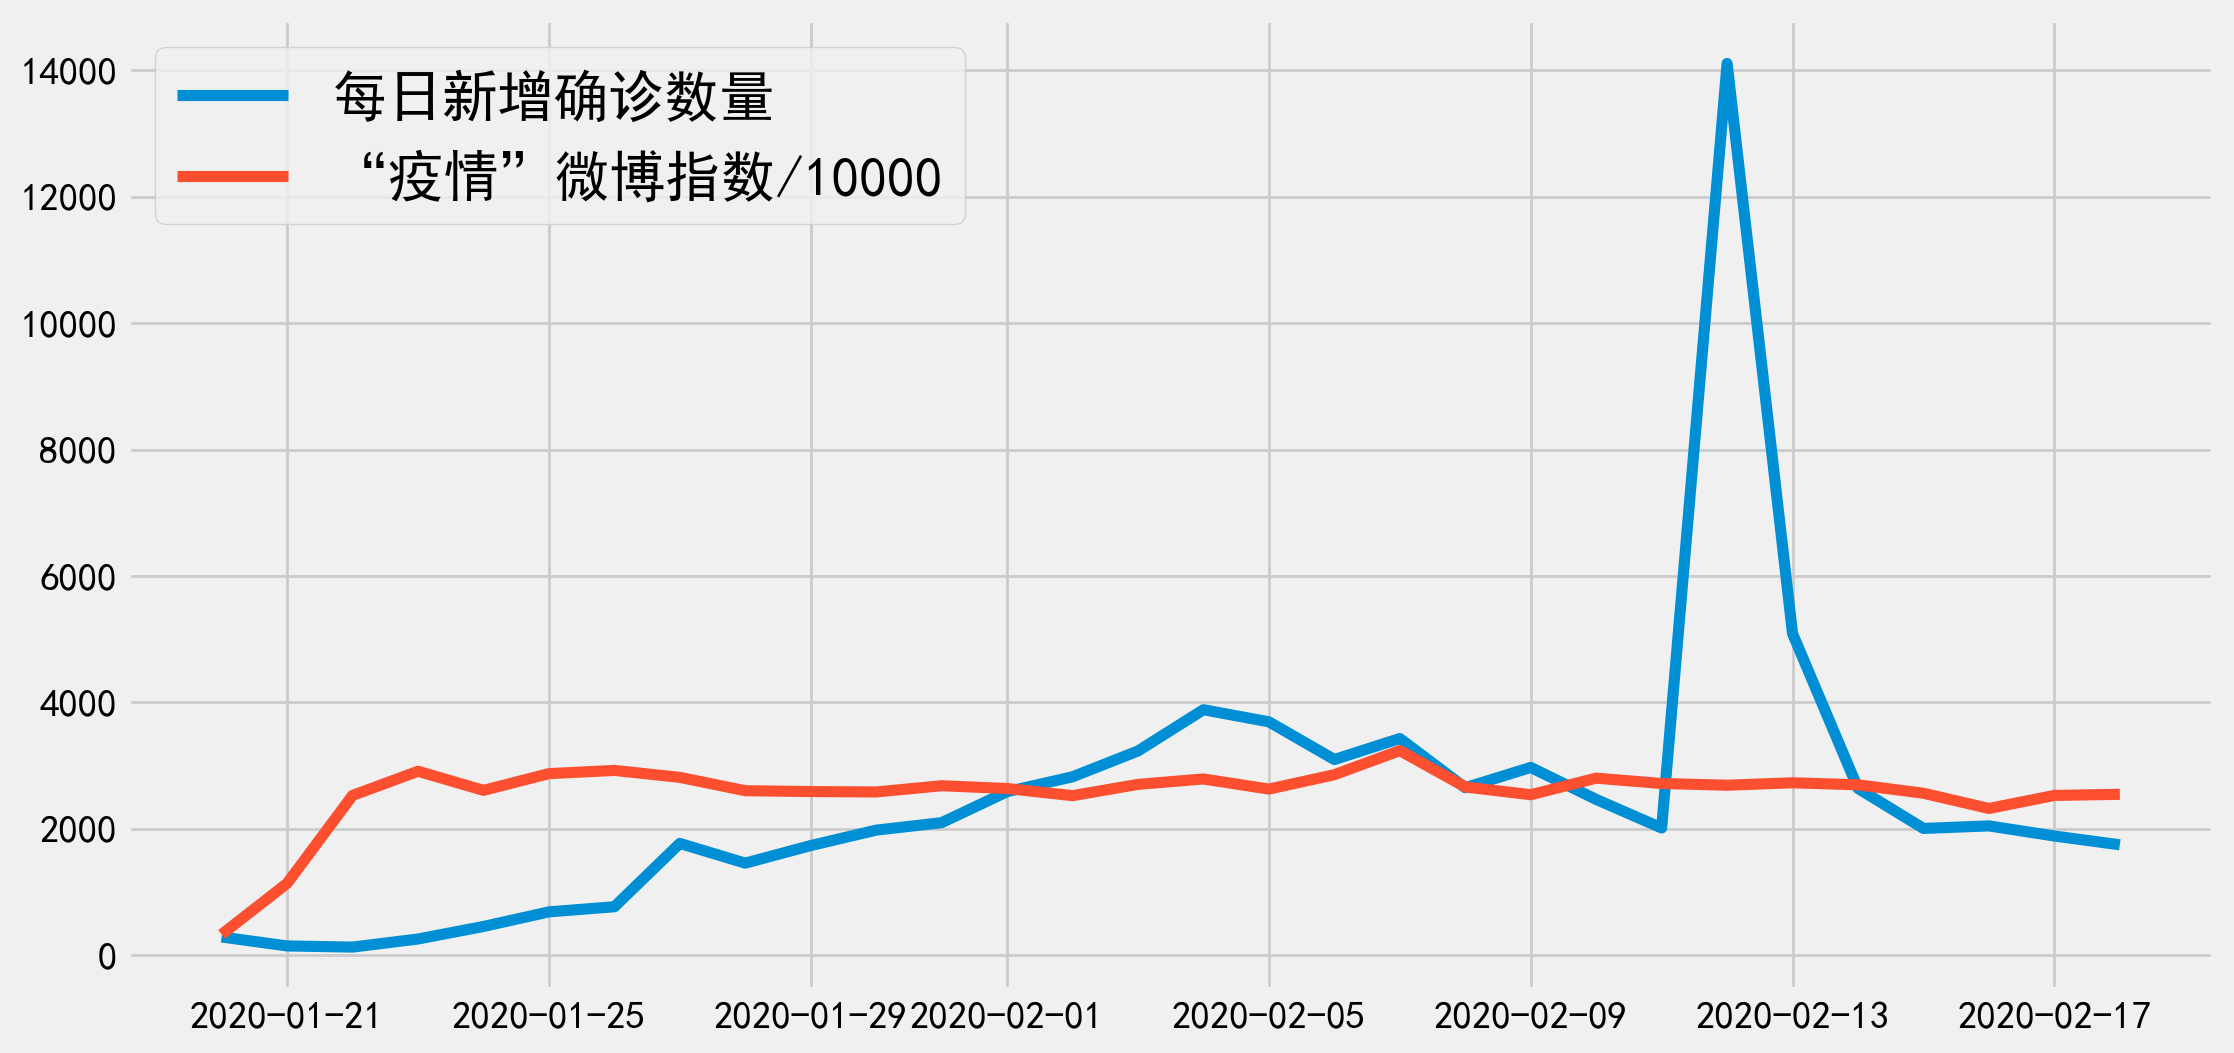

In [235]:
plt.figure(figsize=(12, 6), dpi = 200)
plt.plot(dat.index, dat['confirm_daily'], label = '每日新增确诊数量')
plt.plot(dat.index, dat['疫情']/10000, label = '“疫情”微博指数/10000')
#plt.yscale('log')
plt.legend(fontsize = 20)
plt.show()

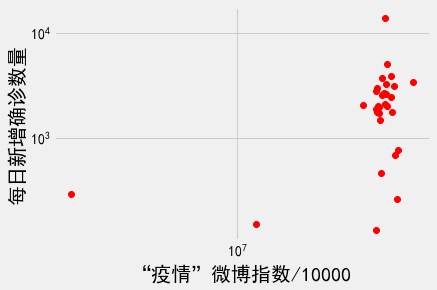

In [237]:
plt.plot(dat['疫情'], dat['confirm_daily'], 'ro')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('“疫情”微博指数/10000', fontsize = 20)
plt.ylabel('每日新增确诊数量', fontsize = 20)
plt.show()

In [238]:
np.corrcoef(dat['疫情'], dat['confirm_daily'])

array([[1.       , 0.2384777],
       [0.2384777, 1.       ]])

In [212]:
np.correlate([1, 2, 3], [0, 1, 0.5]) 

array([3.5])

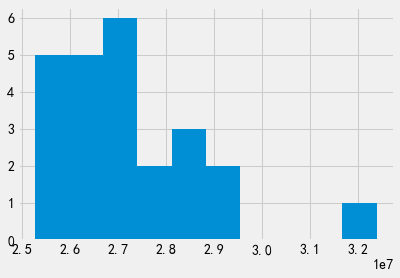

In [206]:
plt.hist(dat['疫情']);

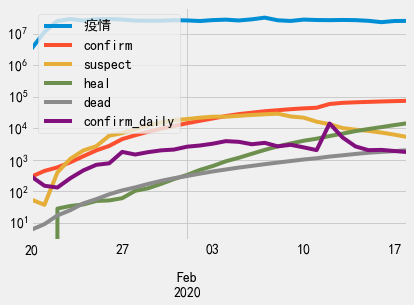

In [239]:
dat.plot()
plt.yscale('log');

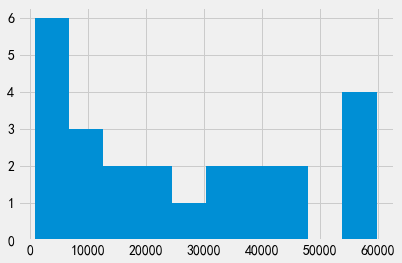

In [207]:
plt.hist(dat['Confirmed']);

In [241]:
dat2 = dat[dat['疫情'] > np.min(dat['疫情'])]

In [242]:
np.corrcoef(dat2['疫情'], dat2['confirm_daily'])

array([[1.        , 0.17958683],
       [0.17958683, 1.        ]])

In [274]:
df = pd.read_csv('Wuhan-2019-nCoV.csv')
df.head()

date country countryCode province  provinceCode city  cityCode  \
0  2019-12-01      中国          CN      NaN           NaN  NaN       NaN   
1  2019-12-01      中国          CN      湖北省      420000.0  NaN       NaN   
2  2019-12-01      中国          CN      湖北省      420000.0  武汉市  420100.0   
3  2019-12-02      中国          CN      NaN           NaN  NaN       NaN   
4  2019-12-02      中国          CN      湖北省      420000.0  NaN       NaN   

   confirmed  suspected  cured  dead  
0          1          0      0     0  
1          1          0      0     0  
2          1          0      0     0  
3          1          0      0     0  
4          1          0      0     0

In [275]:
dat = df[['date', 'country', 'province', 'confirmed']]
dat.head()

date country province  confirmed
0  2019-12-01      中国      NaN          1
1  2019-12-01      中国      湖北省          1
2  2019-12-01      中国      湖北省          1
3  2019-12-02      中国      NaN          1
4  2019-12-02      中国      湖北省          1

In [276]:
print(len(dat))
dat = dat.drop_duplicates()
print(len(dat))

13823
10259


In [278]:
dat = dat[dat['country']=='中国']

In [285]:
dat_country = dat[pd.isnull(df["province"])]

/Users/datalab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [286]:
data = dat[pd.notnull(df["province"])]

/Users/datalab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [287]:
len(data)

9640

In [288]:
data

date country  province  confirmed
1      2019-12-01      中国       湖北省          1
4      2019-12-02      中国       湖北省          1
7      2019-12-03      中国       湖北省          1
10     2019-12-04      中国       湖北省          1
13     2019-12-05      中国       湖北省          1
...           ...     ...       ...        ...
13783  2020-02-20      中国  新疆维吾尔自治区         18
13789  2020-02-20      中国  新疆维吾尔自治区          2
13795  2020-02-20      中国       台湾省         24
13797  2020-02-20      中国   香港特别行政区         65
13799  2020-02-20      中国   澳门特别行政区         10

[9640 rows x 4 columns]

In [292]:
data.pivot(index='date', columns='province', values='confirmed')


ValueError: Index contains duplicate entries, cannot reshape